## Regularization - ML Algo

Regularization is a technique used in machine learning and statistical modeling to prevent overfitting and improve the generalization performance of models. It involves adding a penalty term to the objective function of the model, which discourages overly complex models by imposing constraints on the model parameters. Regularization techniques are commonly used in algorithms like linear regression, logistic regression, and neural networks. Here's an overview of some common regularization techniques:

1. **L1 Regularization (Lasso Regression):**
   - L1 regularization adds the absolute value of the magnitude of coefficients as a penalty term to the loss function.
   - It encourages sparsity in the model by driving some coefficients to exactly zero, effectively performing feature selection.
   - Lasso regression can be useful when the dataset has many features and only a subset of them are relevant.
   - It is defined as:
     $ \text{Loss} = \text{MSE} + \lambda \sum_{i=1}^{n} |\beta_i| $
     where $( \lambda)$ is the regularization parameter.
     

2. **L2 Regularization (Ridge Regression):**
   - L2 regularization adds the sum of squares of the magnitude of coefficients as a penalty term to the loss function.
   - It discourages large coefficients and effectively shrinks them towards zero without making them exactly zero.
   - Ridge regression can help mitigate multicollinearity issues in datasets where predictors are highly correlated.
   - It is defined as:
     $\text{Loss} = \text{MSE} + \lambda \sum_{i=1}^{n} \beta_i^2 $
     where $( \lambda)$ is the regularization parameter.
     

3. **Elastic Net Regularization:**
   - Elastic Net regularization combines both L1 and L2 regularization penalties.
   - It balances between L1 and L2 regularization by including both absolute and square magnitude of coefficients in the penalty term.
   - Elastic Net can be more robust when there are correlated predictors in the dataset.
   - It is defined as:
     $ \text{Loss} = \text{MSE} + \lambda_1 \sum_{i=1}^{n} |\beta_i| + \lambda_2 \sum_{i=1}^{n} \beta_i^2 \ $
     where $( \lambda_1 )$ and $( \lambda_2)$ are regularization parameters.

4. **Dropout (Neural Networks):**
   - Dropout is a regularization technique specific to neural networks.
   - It randomly drops a proportion of neurons during training, forcing the network to learn redundant representations.
   - Dropout helps prevent overfitting by introducing noise and promoting robustness in neural network models.

Regularization techniques are essential tools for building models that generalize well to unseen data. By controlling the complexity of the model, regularization helps strike a balance between bias and variance, leading to better performance on real-world datasets.

While the overarching goal of regularization techniques remains consistent across study materials, the mathematical formulations and intuitions may vary depending on the context and the level of detail covered. Here's how the mathematical intuition might differ across study materials:

1. **Mathematical Formulations:**
   - Different textbooks, research papers, or online resources may present regularization techniques with slight variations in notation and mathematical formulations.
   - Some materials might delve deeply into the derivation of the regularization terms and their integration into the loss function, while others might focus more on the practical implementation and application aspects.

2. **Intuition Behind Regularization:**
   - The intuition behind regularization—preventing overfitting by penalizing overly complex models—remains consistent across materials.
   - However, the emphasis on specific aspects of regularization, such as bias-variance tradeoff, model complexity, and the effect of regularization parameters, may vary.
   - Some materials might provide more intuitive explanations, while others might focus on the mathematical rigor.

3. **Examples and Illustrations:**
   - Study materials may use different examples and illustrations to demonstrate the impact of regularization on model performance.
   - The choice of datasets, visualizations, and case studies can influence the understanding of regularization techniques.

4. **Implementation Details:**
   - Materials that focus on practical implementation often provide code examples, step-by-step guides, and discussions on hyperparameter tuning for regularization techniques.
   - The level of detail regarding the implementation nuances, such as optimization algorithms, cross-validation strategies, and regularization strength selection, may vary.

5. **Theoretical vs. Applied Perspectives:**
   - Some study materials might approach regularization techniques from a theoretical perspective, emphasizing mathematical proofs and statistical principles.
   - Others might take a more applied approach, focusing on real-world datasets, machine learning frameworks, and best practices in model development.

In summary, while the fundamental concepts of regularization remain consistent, the mathematical intuition and depth of coverage may vary across study materials. It's beneficial to explore multiple resources and perspectives to gain a comprehensive understanding of regularization techniques in machine learning and statistical modeling.

# Ridge Regression

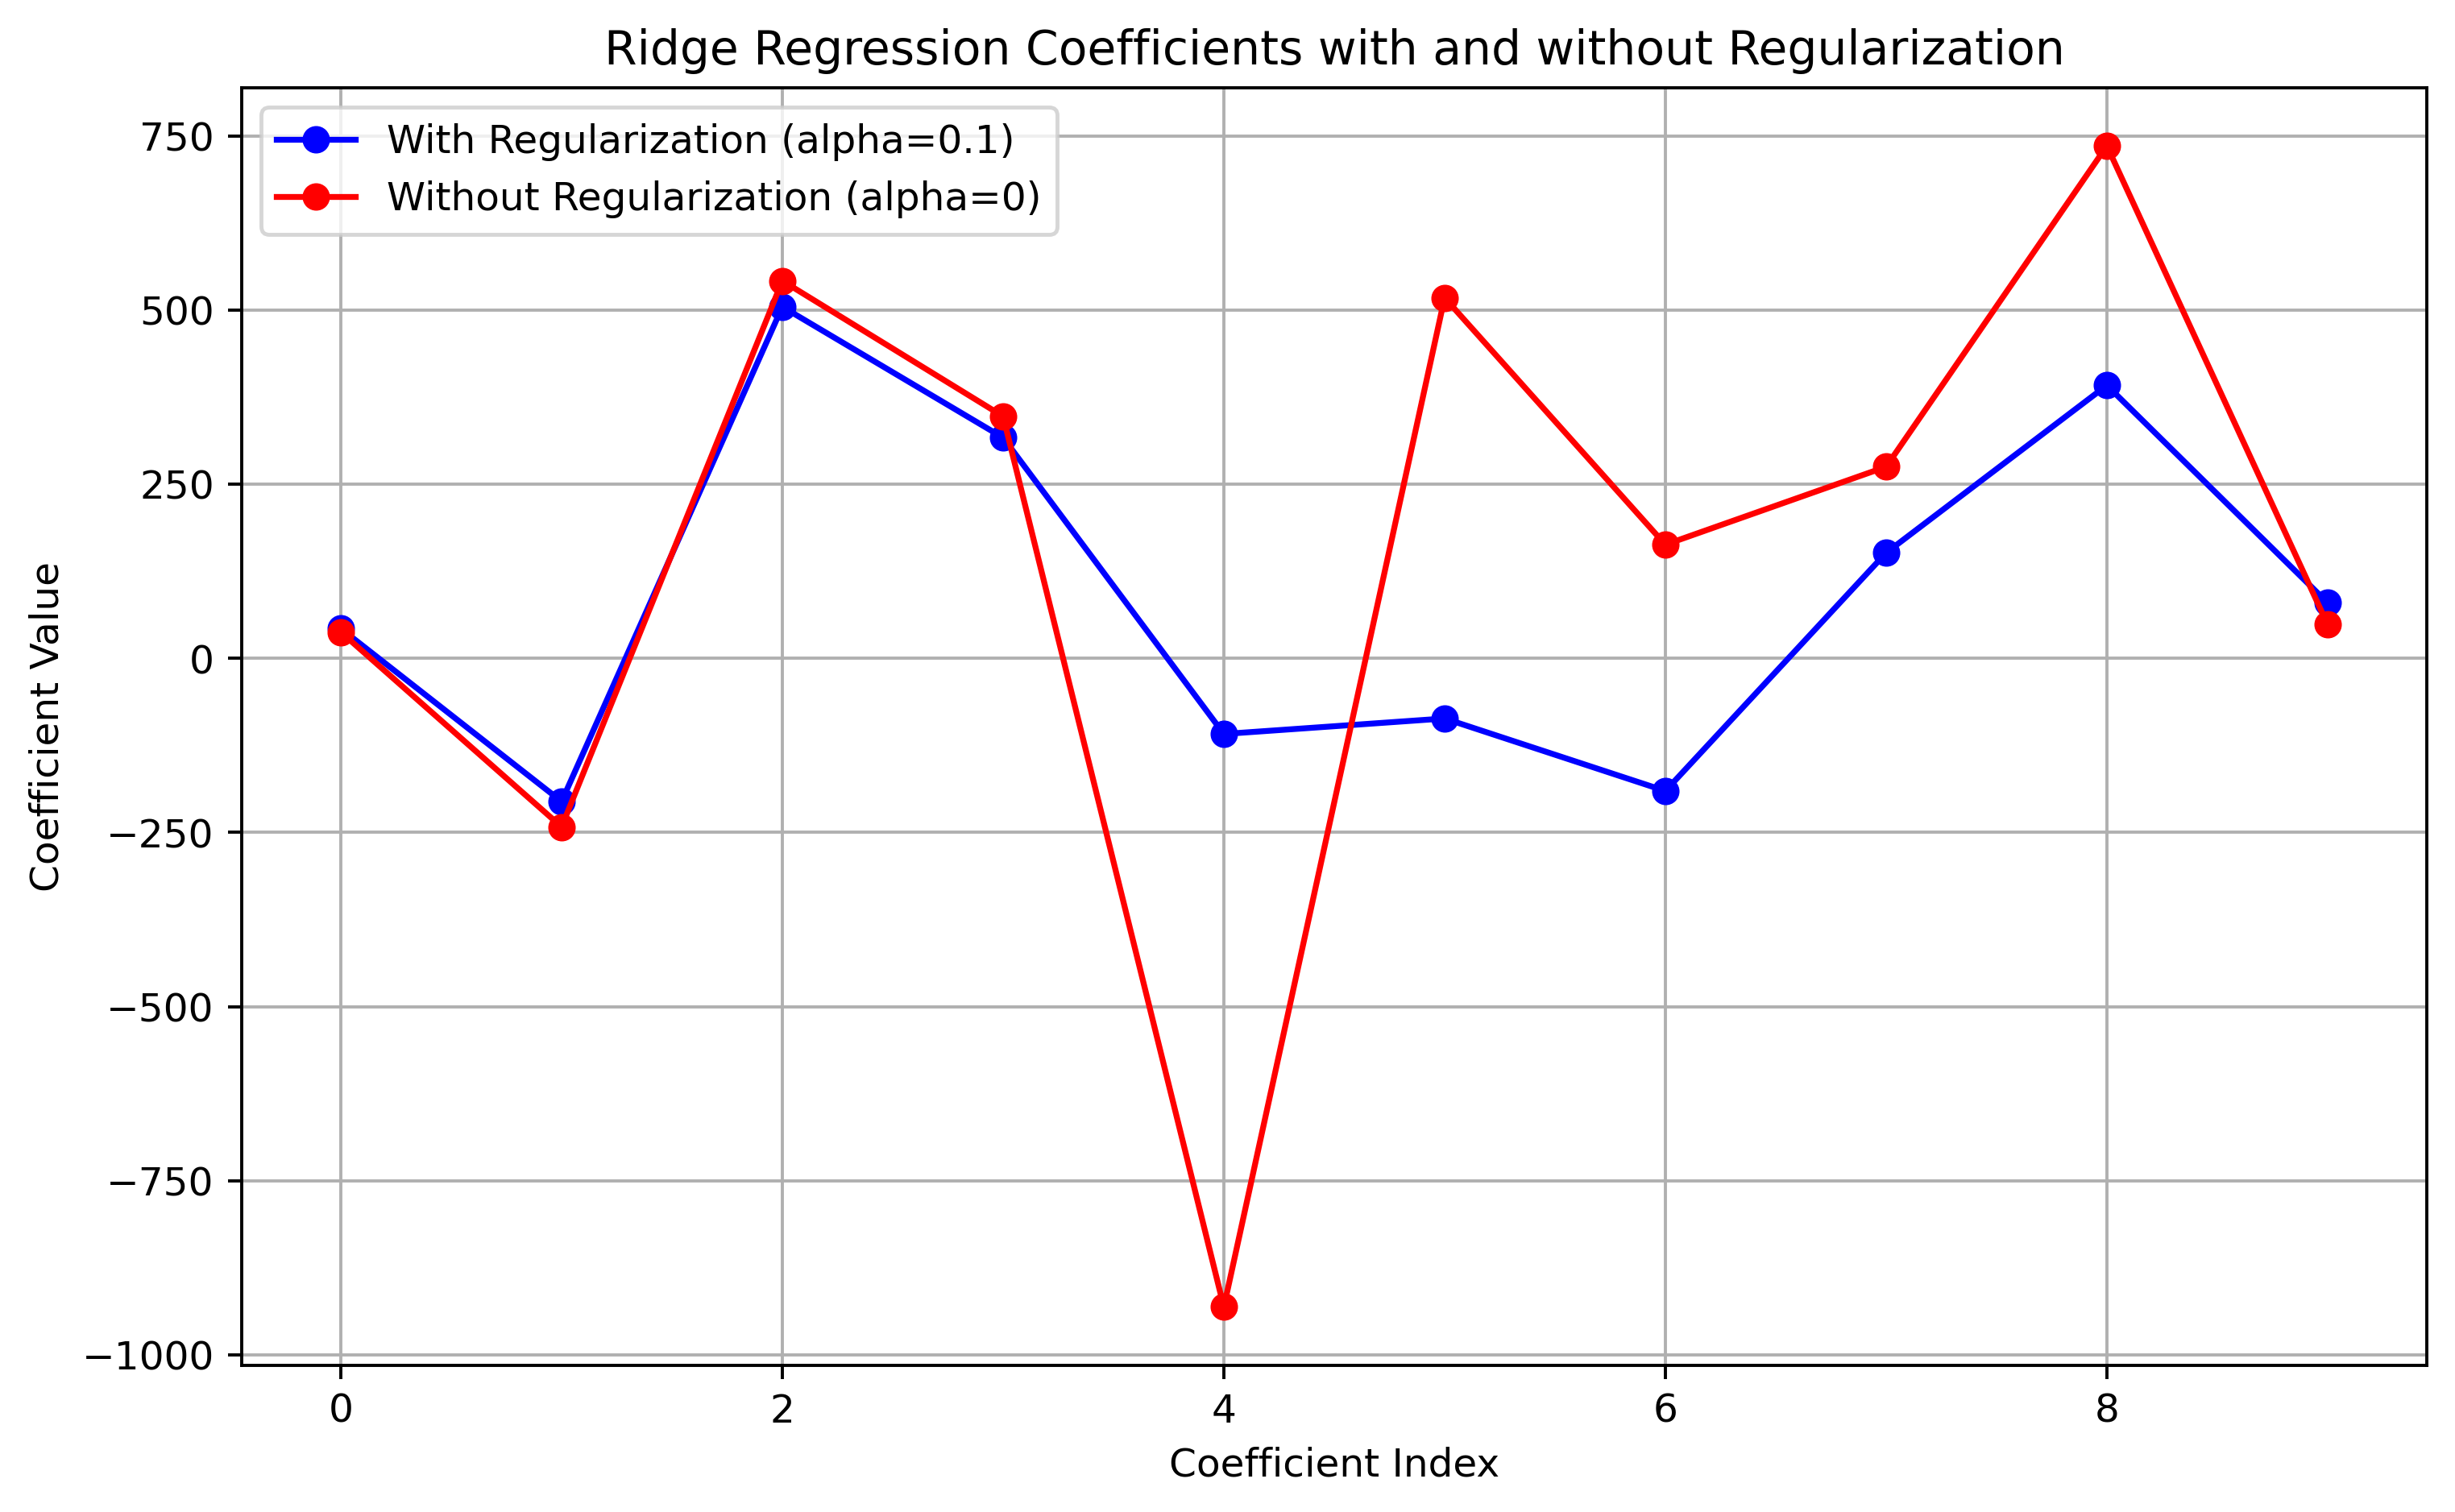

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Load the Diabetes dataset
X, y = load_diabetes(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge Regression models with and without regularization
alpha = 0.1  # Regularization strength
ridge_model_regularized = Ridge(alpha=alpha)
ridge_model_regularized.fit(X_train, y_train)

ridge_model_non_regularized = Ridge(alpha=0)  # No regularization
ridge_model_non_regularized.fit(X_train, y_train)

# Get the coefficients from both models
coef_regularized = ridge_model_regularized.coef_
coef_non_regularized = ridge_model_non_regularized.coef_

# Plotting the coefficients
plt.figure(figsize=(10, 6), dpi=350)
plt.plot(coef_regularized, color='blue', linestyle='-', marker='o', label='With Regularization (alpha=0.1)')
plt.plot(coef_non_regularized, color='red', linestyle='-', marker='o', label='Without Regularization (alpha=0)')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients with and without Regularization')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\inare\Anaconda3\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\inare\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\inare\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

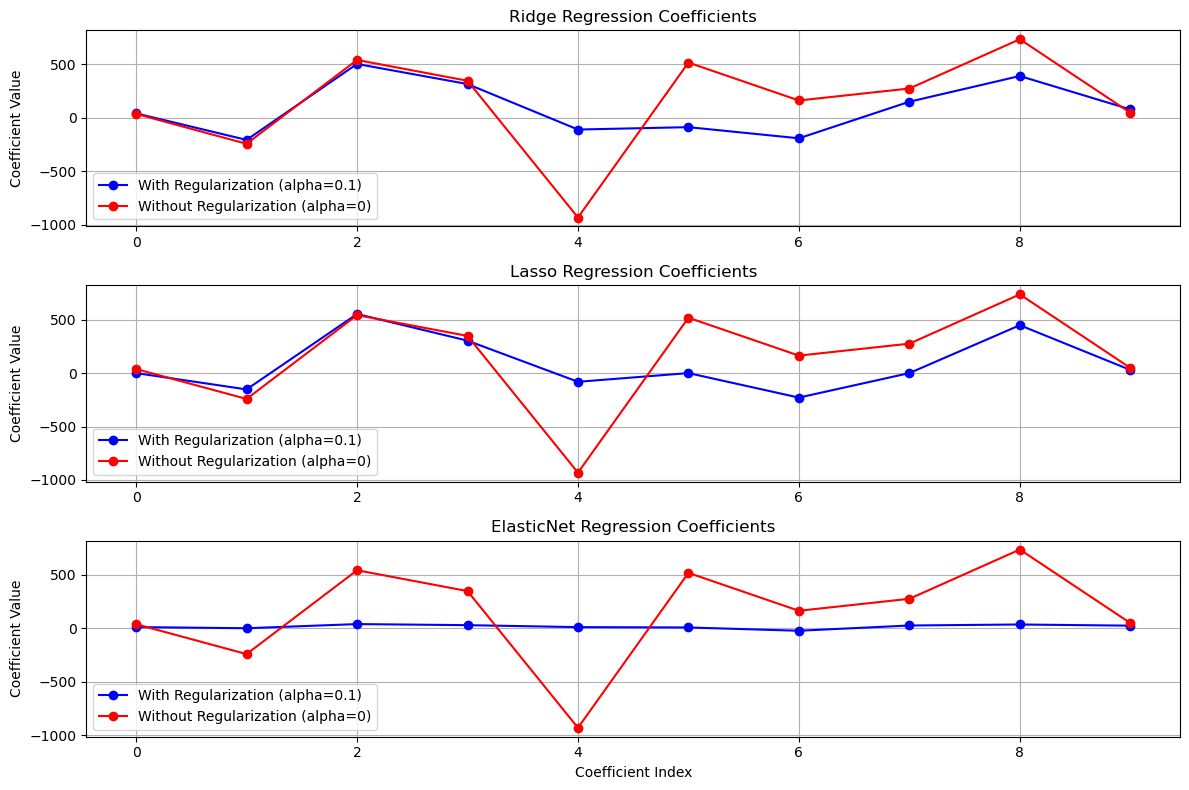

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Load the Diabetes dataset
X, y = load_diabetes(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge, Lasso, and ElasticNet models with and without regularization
alpha = 0.1  # Regularization strength
ridge_model_regularized = Ridge(alpha=alpha)
ridge_model_regularized.fit(X_train, y_train)

ridge_model_non_regularized = Ridge(alpha=0)  # No regularization
ridge_model_non_regularized.fit(X_train, y_train)

lasso_model_regularized = Lasso(alpha=alpha)
lasso_model_regularized.fit(X_train, y_train)

lasso_model_non_regularized = Lasso(alpha=0)
lasso_model_non_regularized.fit(X_train, y_train)

elasticnet_model_regularized = ElasticNet(alpha=alpha, l1_ratio=0.5)  # l1_ratio = 0.5 for balanced ElasticNet
elasticnet_model_regularized.fit(X_train, y_train)

elasticnet_model_non_regularized = ElasticNet(alpha=0, l1_ratio=0.5)
elasticnet_model_non_regularized.fit(X_train, y_train)

# Get the coefficients from all models
coef_ridge_regularized = ridge_model_regularized.coef_
coef_ridge_non_regularized = ridge_model_non_regularized.coef_

coef_lasso_regularized = lasso_model_regularized.coef_
coef_lasso_non_regularized = lasso_model_non_regularized.coef_

coef_elasticnet_regularized = elasticnet_model_regularized.coef_
coef_elasticnet_non_regularized = elasticnet_model_non_regularized.coef_

# Set DPI for the plot
plt.figure(figsize=(12, 8), dpi=100)

# Plot Ridge Regression coefficients
plt.subplot(3, 1, 1)
plt.plot(coef_ridge_regularized, color='blue', linestyle='-', marker='o', label='With Regularization (alpha=0.1)')
plt.plot(coef_ridge_non_regularized, color='red', linestyle='-', marker='o', label='Without Regularization (alpha=0)')
plt.title('Ridge Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)

# Plot Lasso Regression coefficients
plt.subplot(3, 1, 2)
plt.plot(coef_lasso_regularized, color='blue', linestyle='-', marker='o', label='With Regularization (alpha=0.1)')
plt.plot(coef_lasso_non_regularized, color='red', linestyle='-', marker='o', label='Without Regularization (alpha=0)')
plt.title('Lasso Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)

# Plot ElasticNet Regression coefficients
plt.subplot(3, 1, 3)
plt.plot(coef_elasticnet_regularized, color='blue', linestyle='-', marker='o', label='With Regularization (alpha=0.1)')
plt.plot(coef_elasticnet_non_regularized, color='red', linestyle='-', marker='o', label='Without Regularization (alpha=0)')
plt.title('ElasticNet Regression Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [6]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model with regularization strength (alpha)
alpha = 0.1
ridge_model = Ridge(alpha=alpha)

# Fit the model to your data
ridge_model.fit(X_train, y_train)

# The regularization term for Ridge Regression is calculated as the sum of squared coefficients multiplied by alpha
regularization_term_ridge = alpha * np.sum(ridge_model.coef_ ** 2)


In [7]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model with regularization strength (alpha)
alpha = 0.1
lasso_model = Lasso(alpha=alpha)

# Fit the model to your data
lasso_model.fit(X_train, y_train)

# The regularization term for Lasso Regression is calculated as the sum of absolute coefficients multiplied by alpha
regularization_term_lasso = alpha * np.sum(np.abs(lasso_model.coef_))


In [8]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet Regression model with regularization strengths (alpha and l1_ratio)
alpha = 0.1
l1_ratio = 0.5  # l1_ratio = 0.5 for balanced ElasticNet
elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# Fit the model to your data
elasticnet_model.fit(X_train, y_train)

# The regularization term for ElasticNet Regression is a combination of L1 and L2 regularization terms
regularization_term_elasticnet = alpha * ((1 - l1_ratio) * np.sum(elasticnet_model.coef_ ** 2) +
                                         l1_ratio * np.sum(np.abs(elasticnet_model.coef_)))


## Overfitting examples and reasoning 

Overfitting occurs when a machine learning model learns to capture the noise and random fluctuations in the training data, rather than the underlying patterns or relationships. As a result, the model performs well on the training data but fails to generalize to unseen data. This happens because the model has essentially memorized the training data, including its noise and outliers, instead of learning the underlying patterns that are present across different datasets.


Explanation of the code:

1. We generate synthetic data with noise where the relationship between X and y is linear.
2. We split the data into training and testing sets.
3. We define a function `plot_model` to visualize the training and testing data along with the model's predictions.
4. We iterate over different degrees of polynomial features (1, 4, and 15) to fit polynomial regression models to the data.
5. For each degree, we create a polynomial regression model pipeline consisting of polynomial features and linear regression.
6. We fit the model to the training data and plot the model's predictions.
7. We calculate the Mean Squared Error (MSE) on the testing data to quantify the model's performance.

The visualizations and MSE values demonstrate how overfitting occurs as the degree of the polynomial increases. A high-degree polynomial model captures the noise and fluctuations in the training data, resulting in poor generalization to unseen data (testing data). This is evident from the increasing discrepancy between the training and testing data and the increasing MSE as the degree of the polynomial increases, indicating overfitting.

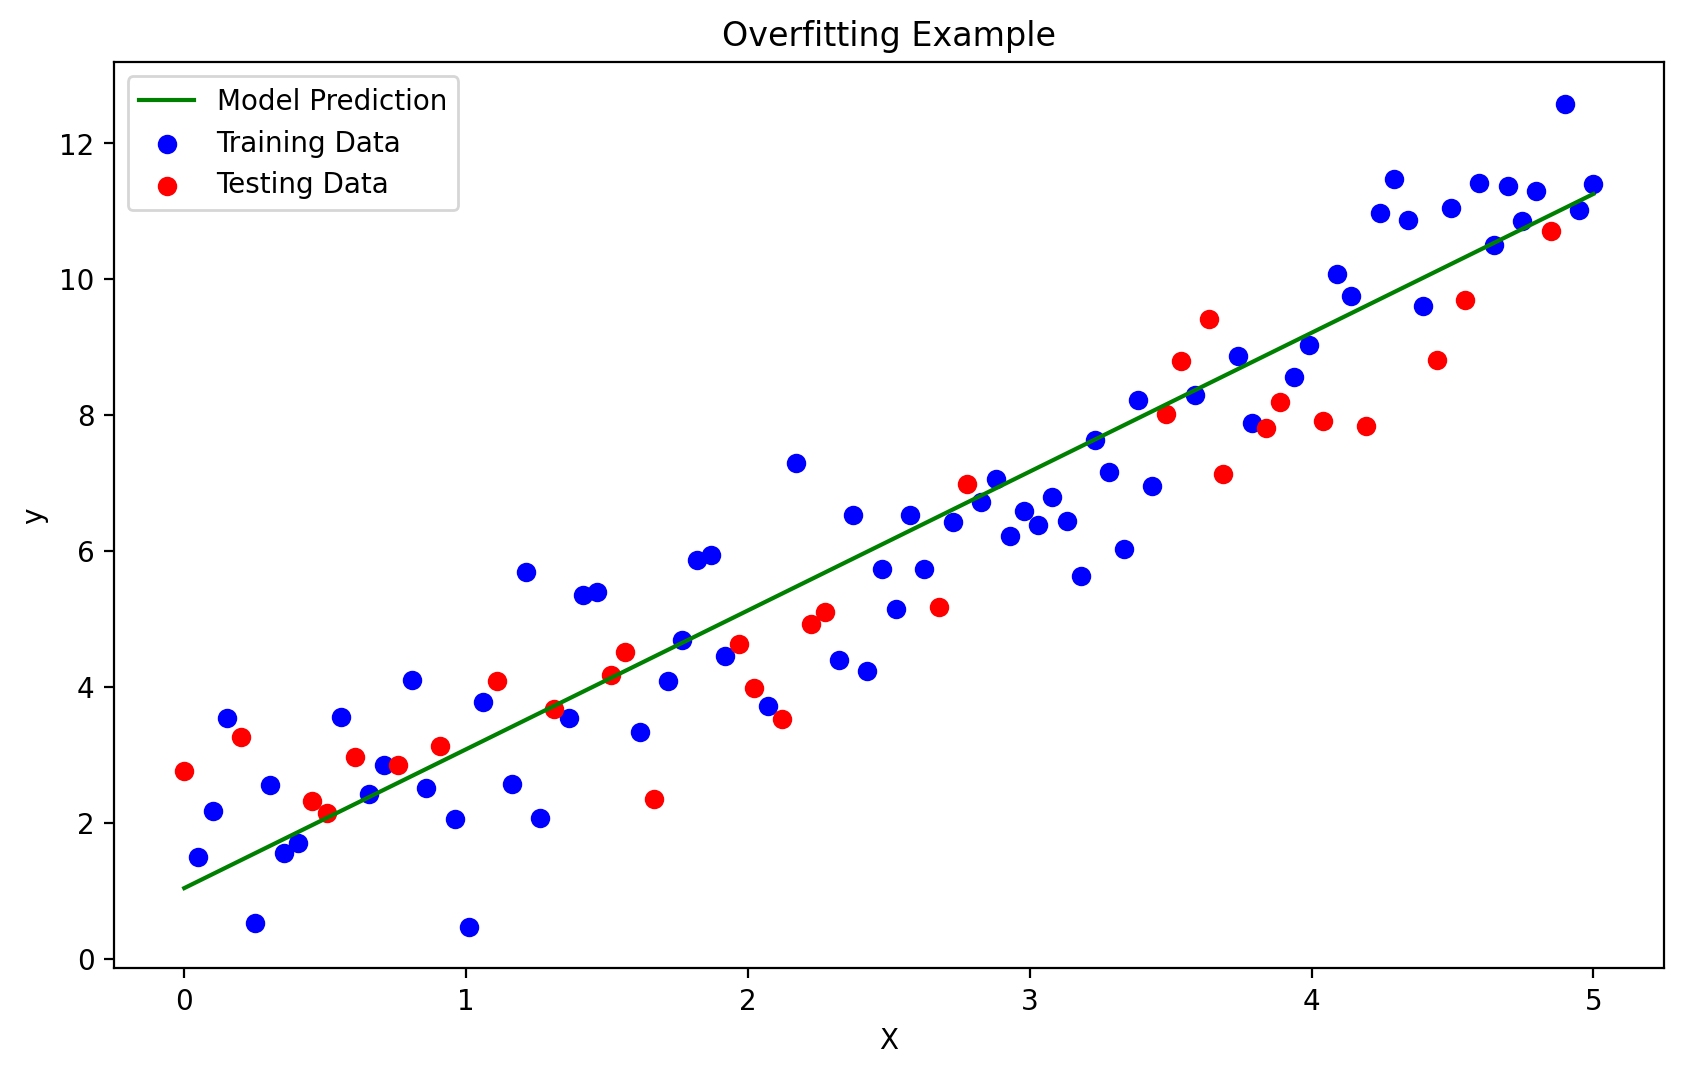

Degree 1 MSE: 1.0598009660146486


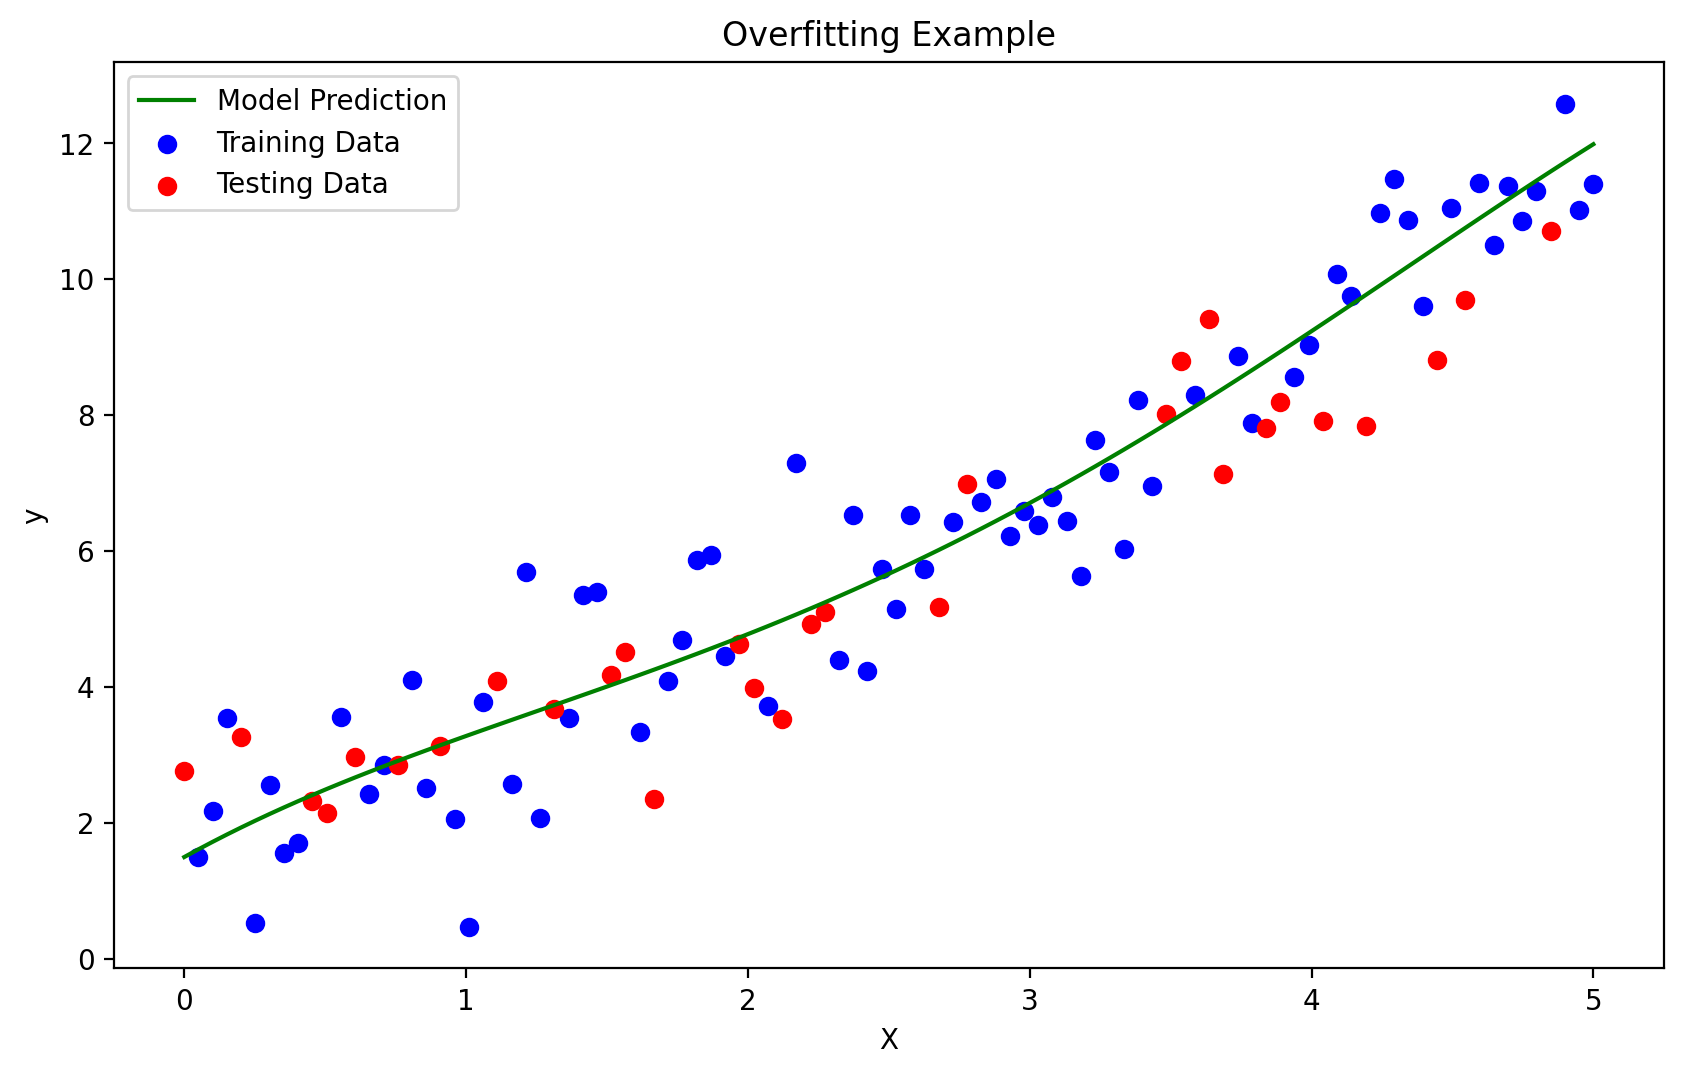

Degree 4 MSE: 0.914489323996094


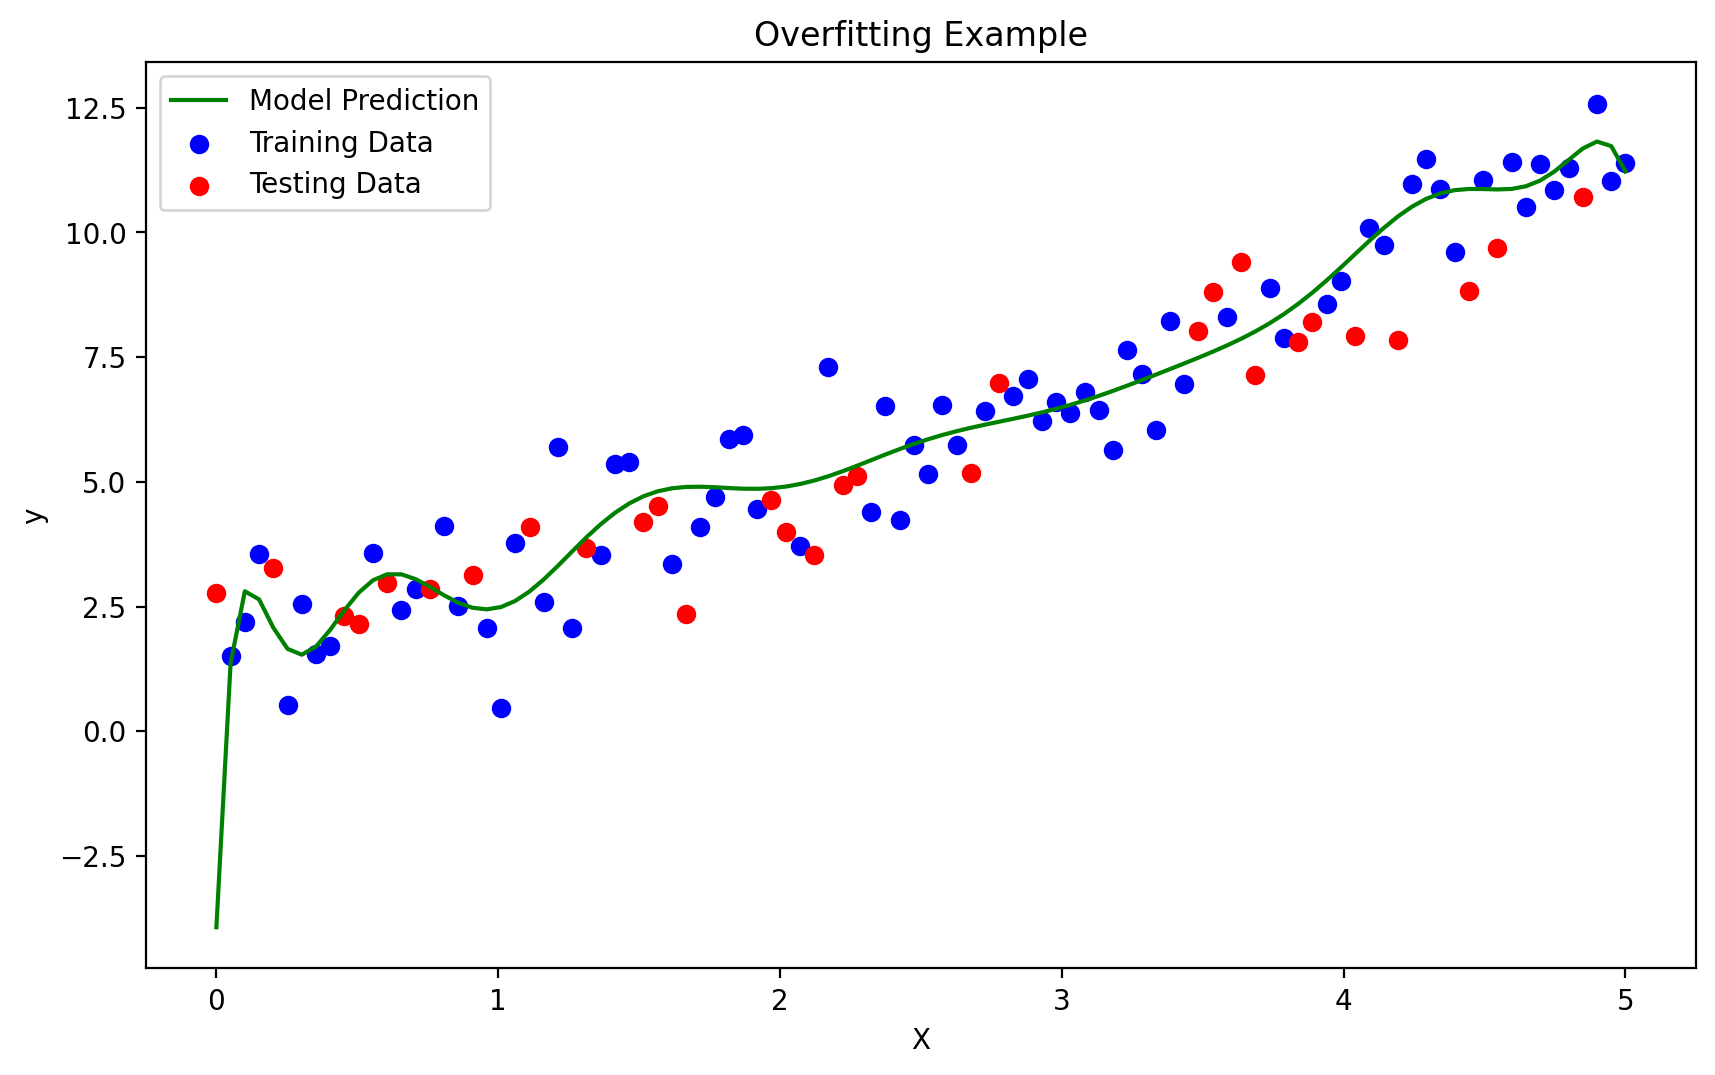

Degree 15 MSE: 2.716564127042863


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data with noise
np.random.seed(0)
X = np.linspace(0, 5, 100)
y = 2 * X + 1 + np.random.normal(0, 1, 100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot the data and the model's predictions
def plot_model(X, y, X_train, y_train, X_test, y_test, model):
    plt.figure(figsize=(10, 6), dpi=200)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='red', label='Testing Data')
    plt.plot(X, model.predict(X[:, np.newaxis]), color='green', label='Model Prediction')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Overfitting Example')
    plt.legend()
    plt.show()

# Degree of polynomial features for the model
degrees = [1, 4, 15]  # Trying different degrees to demonstrate overfitting

for degree in degrees:
    # Create a polynomial regression model pipeline
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    model = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])
    
    # Fit the model to the training data
    model.fit(X_train[:, np.newaxis], y_train)
    
    # Plot the model's predictions
    plot_model(X, y, X_train, y_train, X_test, y_test, model)
    
    # Calculate Mean Squared Error (MSE) on the testing data
    mse = mean_squared_error(y_test, model.predict(X_test[:, np.newaxis]))
    print(f"Degree {degree} MSE: {mse}")


Regularization techniques like L1 (Lasso), L2 (Ridge), and ElasticNet are used in machine learning to prevent overfitting and improve the generalization of models. Here's when to consider using regularization:

1. **High Dimensionality**:
   - When dealing with datasets with a large number of features, regularization helps prevent overfitting by penalizing large coefficients and encouraging sparsity in the model.

2. **Multicollinearity**:
   - Regularization techniques are effective when dealing with multicollinearity, where independent variables are highly correlated. Regularization helps stabilize the coefficients and makes them more interpretable.

3. **Preventing Overfitting**:
   - Regularization is particularly useful when models are overfitting, capturing noise and fluctuations in the training data. By penalizing large coefficients, regularization techniques promote simpler models that generalize better to unseen data.



In this example:
- We generate synthetic data using `make_regression`.
- We split the data into training and testing sets.
- We train Ridge Regression models with different alpha values (0, 0.1, 1, 10, 100), representing different levels of regularization strength.
- We plot the model's predictions on the test data for each alpha value and visualize how the model changes with different regularization strengths.
- We calculate and print the Mean Squared Error (MSE) for each model, providing a measure of its performance on the test data.

This example demonstrates visually how regularization affects the Ridge Regression model's predictions and how different levels of regularization strength impact model performance. Adjusting the regularization strength allows us to control model complexity and prevent overfitting.

Alpha: 0, MSE: 103.47302683438758
Alpha: 0.1, MSE: 103.55273031545674
Alpha: 1, MSE: 104.73923652620921
Alpha: 10, MSE: 149.69446082496492
Alpha: 100, MSE: 839.4126031963353


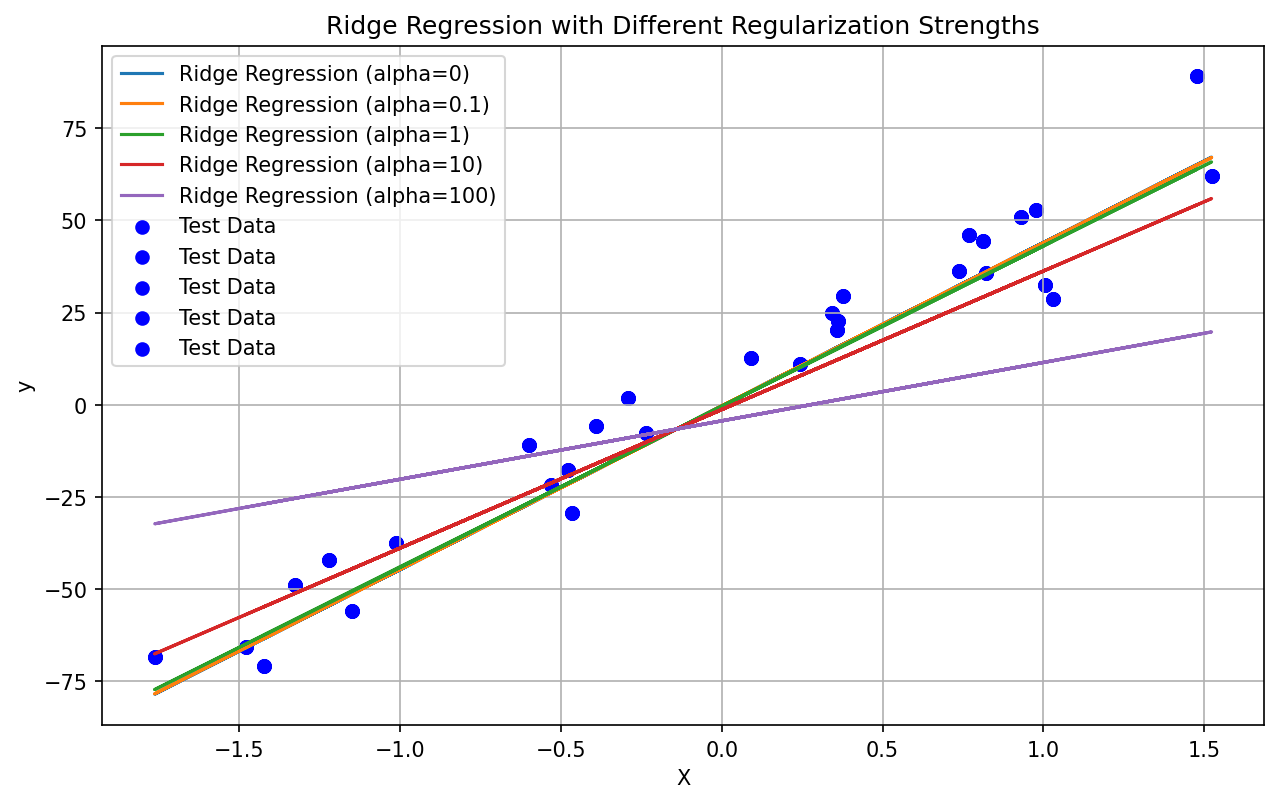

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Ridge Regression models with different alpha values (regularization strength)
alphas = [0, 0.1, 1, 10, 100]  # Different regularization strengths
coefficients = []

plt.figure(figsize=(10, 6), dpi=150)

# Fit and visualize Ridge Regression models
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    
    # Plot the model's predictions
    plt.scatter(X_test, y_test, color='blue', label='Test Data')
    plt.plot(X_test, y_pred, label=f'Ridge Regression (alpha={alpha})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Ridge Regression with Different Regularization Strengths')
    plt.legend()

    # Calculate and print the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Alpha: {alpha}, MSE: {mse}")

plt.grid(True)
plt.show()


In addition to the basics of regularization techniques like L1 (Lasso), L2 (Ridge), and ElasticNet, there are several important concepts and considerations to be aware of:

1. **Choice of Regularization Strength (Hyperparameter Tuning)**:
   - The choice of the regularization strength parameter (alpha or lambda) is crucial. It determines how much emphasis is placed on regularization versus fitting the training data. 
   - The regularization strength is often tuned using techniques like cross-validation or grid search to find the optimal value that minimizes the model's error on unseen data.

2. **Feature Scaling**:
   - Regularization techniques can be sensitive to the scale of features. It's often recommended to scale the features to a similar range (e.g., using standardization or normalization) before applying regularization.
   - Feature scaling ensures that each feature contributes proportionately to the regularization penalty.

3. **Interpretability**:
   - Regularization techniques like L1 (Lasso) can drive some coefficients to exactly zero, effectively performing feature selection. This can make the model more interpretable by identifying the most important features.
   - On the other hand, L2 (Ridge) regularization tends to shrink coefficients towards zero without eliminating them entirely, which can lead to a less sparse model.

4. **ElasticNet**:
   - ElasticNet combines both L1 and L2 regularization penalties. It offers a balance between the feature selection capabilities of Lasso and the stability of Ridge regression.
   - ElasticNet introduces an additional hyperparameter, the mixing parameter (l1_ratio), which controls the balance between L1 and L2 penalties.

5. **Computational Complexity**:
   - The computational complexity of regularization techniques can vary depending on the optimization algorithm used and the size of the dataset.
   - While Lasso regularization can lead to sparse solutions, it involves solving an optimization problem with an L1 penalty, which can be computationally more expensive compared to Ridge regularization.

6. **Generalization Performance**:
   - Regularization techniques help improve the generalization performance of machine learning models by reducing overfitting. However, it's essential to strike a balance between bias and variance.
   - Strong regularization may lead to underfitting, where the model is too simple to capture the underlying patterns in the data.

7. **Other Regularization Techniques**:
   - Besides L1, L2, and ElasticNet regularization, there are other regularization techniques such as dropout regularization in neural networks, early stopping, and data augmentation, each designed to prevent overfitting in specific contexts.

Understanding these additional aspects of regularization techniques can help you effectively apply them to improve the robustness and generalization performance of your machine learning models.

# SKLEARN Regression Parameters 

In scikit-learn's logistic regression implementation, there are several parameters that can be adjusted to customize the behavior of the logistic regression model. Here's an explanation of the most commonly used parameters:

1. **penalty**:
   - Specifies the norm used in the regularization term. It can be either 'l1' (L1 regularization), 'l2' (L2 regularization), or 'none' (no regularization).

2. **C**:
   - Inverse of regularization strength. Smaller values specify stronger regularization.
   - A lower C value indicates more regularization, which helps prevent overfitting by penalizing large coefficients.

3. **solver**:
   - Algorithm to use in the optimization problem. It affects the speed and performance of the model.
   - Options include 'liblinear', 'newton-cg', 'lbfgs', 'sag', and 'saga', among others.
   - The choice of solver depends on the size of the dataset, the number of features, and the desired level of accuracy.

4. **max_iter**:
   - Maximum number of iterations taken for the solver to converge.
   - Convergence occurs when the change in the coefficients between iterations is small.
   - Increasing max_iter may be necessary if the solver does not converge within the default number of iterations.

5. **class_weight**:
   - Weights associated with classes in the target variable.
   - Useful for handling class imbalance by assigning higher weights to minority classes.
   - Options include 'balanced' (automatically adjusts weights inversely proportional to class frequencies) or a dictionary specifying custom class weights.

6. **random_state**:
   - Controls the randomness of the algorithm, ensuring reproducibility of results.
   - When set to a specific integer value, it ensures that the same random splits are generated each time the model is trained.

7. **multi_class**:
   - Specifies the strategy to use for multiclass classification problems.
   - Options include 'ovr' (one-vs-rest) and 'multinomial' (softmax regression).
   - 'ovr' treats each class as a binary problem, while 'multinomial' optimizes a common objective function over all classes simultaneously.

These are some of the key parameters available in scikit-learn's logistic regression implementation. The choice of parameters depends on the specific characteristics of the dataset and the objectives of the modeling task. It's often necessary to experiment with different parameter values and evaluate the model's performance using cross-validation or holdout sets to find the optimal configuration.

# Performance Metrics

Performance metrics such as Precision, Recall, F1 Score, ROC (Receiver Operating Characteristic) curve, and AUC (Area Under the Curve) are crucial tools in evaluating the effectiveness of classification models. Here's an overview of each metric:

1. **Precision**:
   - Precision measures the proportion of true positive predictions among all positive predictions made by the model.
   - It is calculated as the ratio of true positives (TP) to the sum of true positives and false positives (FP):
     $ \text{Precision} = \frac{TP}{TP + FP} $
   - Precision is particularly useful when the cost of false positives is high, and we want to minimize the number of false positive predictions.
   

2. **Recall (Sensitivity)**:
   - Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
   - It is calculated as the ratio of true positives (TP) to the sum of true positives and false negatives (FN):
     $ \text{Recall} = \frac{TP}{TP + FN} $
   - Recall is crucial when the cost of false negatives is high, and we want to minimize the number of false negative predictions.


3. **F1 Score**:
   - F1 Score is the harmonic mean of Precision and Recall.
   - It provides a single score that balances Precision and Recall.
   - F1 Score is calculated as:
    $ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $
   - F1 Score reaches its best value at 1 (perfect precision and recall) and worst at 0.


4. **ROC Curve (Receiver Operating Characteristic Curve)**:
   - The ROC curve is a graphical representation of the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for different classification thresholds.
   - TPR is the same as Recall, and FPR is calculated as the ratio of false positives (FP) to the sum of false positives and true negatives (TN).
   - The ROC curve plots TPR against FPR at various threshold settings.
   - AUC measures the area under the ROC curve, which indicates the model's ability to distinguish between positive and negative classes.
   - AUC ranges from 0 to 1, where 0.5 indicates random guessing, and 1 indicates a perfect classifier.


These performance metrics provide valuable insights into the performance of classification models and help in evaluating and comparing different models. Depending on the specific requirements of the problem and the associated costs of false positives and false negatives, different metrics may be prioritized. It's essential to consider these metrics comprehensively to make informed decisions about model selection and optimization.

Explaining precision and recall to a small kid can be done using a simple analogy involving a game of treasure hunting:

1. **Precision**:
   - Precision is like hitting the treasure when you're told there's treasure hidden in a certain area.
   - Imagine you're playing a treasure hunt game with your friends. You're digging in a specific area because you were told the treasure might be there.
   - Precision tells us how many times you dug and found real treasure, compared to how many times you dug and found something else (like a rock or dirt).
   - If you dig five times and find treasure four times, your precision is very high because you mostly found real treasure when you dug.
   - But if you only found treasure two times out of five, your precision is lower because you found real treasure less often when you dug.

2. **Recall**:
   - Recall is like finding all the treasure hidden in the game, without missing any.
   - Imagine your friends hid treasure in different places, and you want to find all of it.
   - Recall tells us how many times you found all the hidden treasure compared to how many times you missed finding some treasure.
   - If your friends hid ten treasures and you found all ten, your recall is very high because you found everything.
   - But if you only found five out of ten treasures, your recall is lower because you missed some treasures.

In simpler terms, precision is about how good you are at finding real treasure when you're digging, while recall is about making sure you find all the treasure that's hidden. Both precision and recall help us understand how good we are at playing the treasure hunt game and finding what we're looking for.


1. **Precision**:
   - Precision is about being precise or accurate in your predictions.
   - In tech terms, precision measures how many of the items your model predicted as positive are actually positive.
   - For example, if your spam email filter predicts 10 emails as spam, and out of those 10, only 7 are actually spam, then your precision is 7 out of 10.
   - A high precision means that when your model predicts something as positive, it's usually correct.

2. **Recall**:
   - Recall is about not missing out on things that are important.
   - In tech terms, recall measures how many of the actual positive items your model correctly identifies.
   - Going back to the spam email filter example, if there are 20 spam emails in total, but your model only identifies 15 of them, then your recall is 15 out of 20.
   - A high recall means that your model is good at capturing most of the positive instances.

In summary, precision is about how accurate your positive predictions are, while recall is about how good your model is at capturing all the positive instances, even if it means making some mistakes along the way. Both precision and recall provide valuable insights into the performance of your model and are important metrics to consider when evaluating its effectiveness.

Let's break down the concepts of true positives and false positives in a simple way:

1. **True Positives (TP)**:
   - True positives are the correct positive predictions made by a model.
   - In other words, true positives occur when the model correctly identifies instances of the positive class.
   - For example, if we're building a model to detect cats in pictures, a true positive occurs when the model correctly identifies an image containing a cat as "containing a cat."

2. **False Positives (FP)**:
   - False positives are incorrect positive predictions made by a model.
   - False positives occur when the model incorrectly identifies instances of the negative class as positive.
   - Using the same example of cat detection, a false positive would be if the model identifies an image that doesn't contain a cat as "containing a cat."
   

3. **True Negatives (TN)**:
   - True negatives are correct negative predictions made by a model.
   - In binary classification, where we have two classes (positive and negative), true negatives occur when the model correctly identifies instances of the negative class.
   - For example, in a medical test for a disease, true negatives would represent cases where the test correctly identifies individuals who do not have the disease.
   - In spam email filtering, true negatives would represent emails that are correctly identified as not spam.

4. **False Negatives (FN)**:
   - False negatives are incorrect negative predictions made by a model.
   - In binary classification, false negatives occur when the model incorrectly identifies instances of the positive class as negative.
   - For example, in medical testing for a disease, false negatives would represent cases where the test incorrectly identifies individuals who have the disease as not having it.
   - In spam email filtering, false negatives would represent emails that are incorrectly classified as not spam when they are actually spam.

In summary:
- False negatives are instances where the model incorrectly identifies positive cases as negative.
- They are important to consider, especially in scenarios where missing positive instances can have significant consequences, such as in medical diagnoses or security applications.

Understanding false negatives, along with true positives, false positives, and true negatives, helps provide a comprehensive assessment of a model's performance in binary classification tasks.

- True negatives are instances where the model correctly identifies negative cases as negative.
- They are crucial for understanding the performance of a model, especially in scenarios where correctly identifying negative instances is as important as identifying positive instances.

Understanding true negatives, along with true positives and false positives, provides a comprehensive picture of a model's performance in binary classification tasks.

- True positives are correct positive predictions.
- False positives are incorrect positive predictions.

In various applications, understanding true positives and false positives helps us evaluate the performance of a model, especially in scenarios where identifying positive instances correctly is crucial, such as in medical diagnoses, fraud detection, or spam filtering.

## Confusion Matrix

A confusion matrix is a tabular representation of the performance of a classification model, showing the counts of true positive, true negative, false positive, and false negative predictions. It helps visualize the performance metrics of a model and evaluate its accuracy and effectiveness in classifying instances.

Here's how a confusion matrix is typically organized:

- **True Positives (TP)**: The number of instances that were correctly predicted as positive by the model.
- **True Negatives (TN)**: The number of instances that were correctly predicted as negative by the model.
- **False Positives (FP)**: The number of instances that were incorrectly predicted as positive by the model (actually negative).
- **False Negatives (FN)**: The number of instances that were incorrectly predicted as negative by the model (actually positive).

The confusion matrix is often presented in a table format, where the rows represent the actual classes or labels, and the columns represent the predicted classes or labels. For a binary classification problem, the confusion matrix typically looks like this:

```
                    Predicted Positive     Predicted Negative
Actual Positive           TP (True Positive)    FN (False Negative)
Actual Negative           FP (False Positive)   TN (True Negative)
```

Each cell in the confusion matrix represents a specific outcome of the model's predictions. By analyzing the values in the confusion matrix, we can calculate various performance metrics such as accuracy, precision, recall, F1 score, and specificity.

The confusion matrix provides a clear overview of the model's strengths and weaknesses and helps identify areas for improvement, such as reducing false positives or false negatives, depending on the specific requirements of the application.

                                           | Predicted Positive | Predicted Negative |
Actual Positive       | TP (True Positive)  | FN (False Negative) |
----------------------|---------------------|---------------------|
Actual Negative       | FP (False Positive) | TN (True Negative)  |


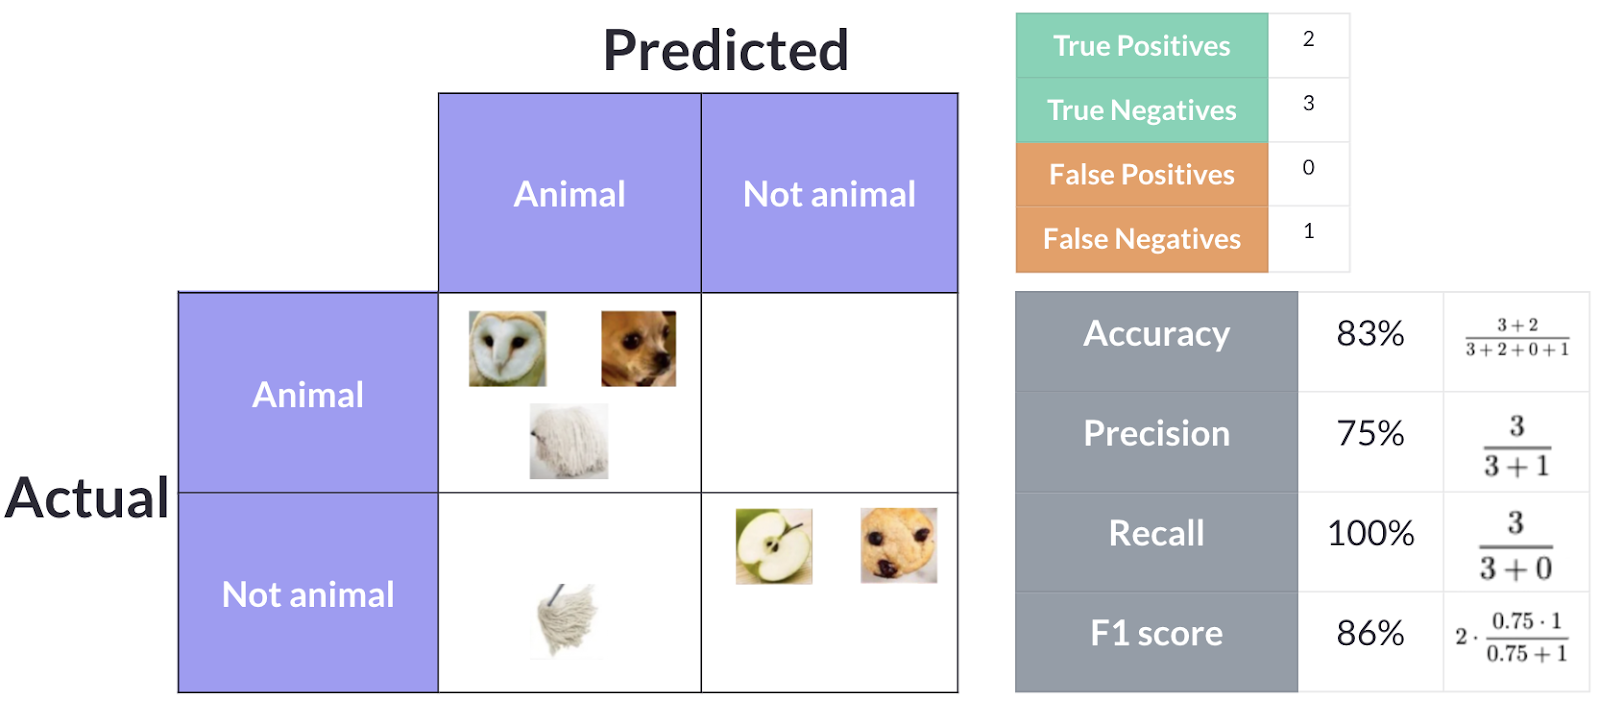

### Scenario 1: Balanced Importance of Precision and Recall
- **Problem**: Both precision and recall are equally important, and there is no significant difference in the cost of false positives and false negatives.
- **Example**: Email Spam Detection
- **Beta Value**: β = 1 (Default F1 Score)
- **Importance**: Balanced emphasis on both precision and recall.
- **Formula**: \( F_1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} \)

### Scenario 2: Higher Importance on Precision
- **Problem**: False positives (incorrectly labeling non-spam emails as spam) are costly, and precision is more important than recall.
- **Example**: Fraud Detection in Financial Transactions
- **Beta Value**: β > 1 (e.g., β = 2)
- **Importance**: Emphasis on maximizing precision while maintaining reasonable recall.
- **Formula**: \( F_2 = (1 + 2^2) \cdot \frac{\text{precision} \cdot \text{recall}}{(4 \cdot \text{precision}) + \text{recall}} \)

### Scenario 3: Higher Importance on Recall
- **Problem**: False negatives (failing to detect fraudulent transactions) are costly, and recall is more important than precision.
- **Example**: Medical Diagnostic Test for Cancer Detection
- **Beta Value**: β < 1 (e.g., β = 0.5)
- **Importance**: Emphasis on maximizing recall while maintaining reasonable precision.
- **Formula**: \( F_{0.5} = (1 + 0.5^2) \cdot \frac{\text{precision} \cdot \text{recall}}{(0.25 \cdot \text{precision}) + \text{recall}} \)

### Scenario 4: Balanced but Slightly More Emphasis on Precision
- **Problem**: Both precision and recall are important, but there's a slightly higher emphasis on precision.
- **Example**: Customer Churn Prediction for Subscription Services
- **Beta Value**: β = 0.75
- **Importance**: Balanced emphasis with a slight tilt towards precision.
- **Formula**: \( F_{0.75} = (1 + 0.75^2) \cdot \frac{\text{precision} \cdot \text{recall}}{(0.5625 \cdot \text{precision}) + \text{recall}} \)

### Scenario 5: Balanced but Slightly More Emphasis on Recall
- **Problem**: Both precision and recall are important, but there's a slightly higher emphasis on recall.
- **Example**: Disease Outbreak Prediction in Public Health
- **Beta Value**: β = 0.9
- **Importance**: Balanced emphasis with a slight tilt towards recall.
- **Formula**: \( F_{0.9} = (1 + 0.9^2) \cdot \frac{\text{precision} \cdot \text{recall}}{(0.81 \cdot \text{precision}) + \text{recall}} \)

In each scenario, the choice of the beta parameter allows you to adjust the balance between precision and recall according to the specific requirements and priorities of the problem at hand.

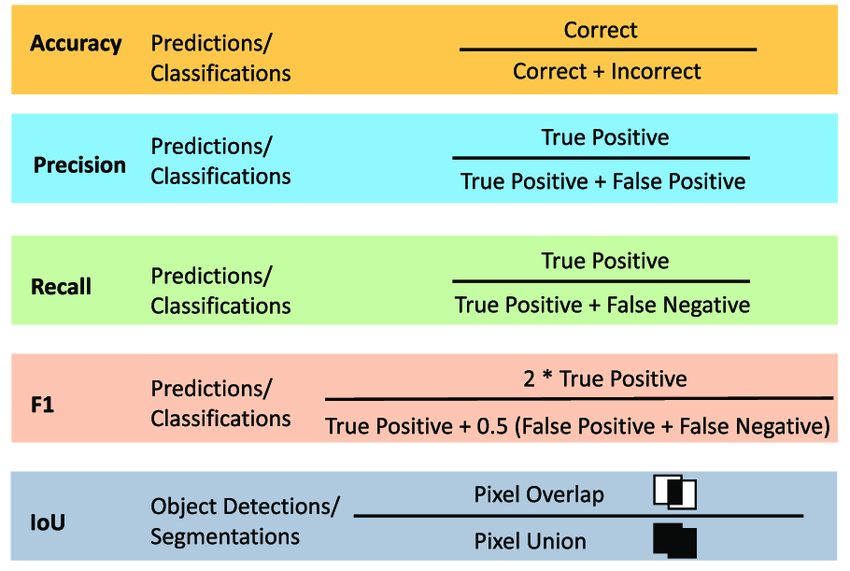

In Python, you can compute the F-beta score using various libraries, including scikit-learn and other custom implementations. Here's how you can perform F-beta score calculation using scikit-learn for each scenario:

### Using scikit-learn for F-beta Score Calculation:

1. **Balanced Importance of Precision and Recall** (Default F1 Score):
   ```python
   from sklearn.metrics import f1_score

   y_true = [...]  # True labels
   y_pred = [...]  # Predicted labels

   f1 = f1_score(y_true, y_pred)
   ```

2. **Higher Importance on Precision**:
   ```python
   from sklearn.metrics import fbeta_score

   y_true = [...]  # True labels
   y_pred = [...]  # Predicted labels
   beta = 2        # Beta value

   f_beta = fbeta_score(y_true, y_pred, beta=beta)
   ```

3. **Higher Importance on Recall**:
   ```python
   from sklearn.metrics import fbeta_score

   y_true = [...]  # True labels
   y_pred = [...]  # Predicted labels
   beta = 0.5      # Beta value

   f_beta = fbeta_score(y_true, y_pred, beta=beta)
   ```

4. **Balanced but Slightly More Emphasis on Precision**:
   ```python
   from sklearn.metrics import fbeta_score

   y_true = [...]  # True labels
   y_pred = [...]  # Predicted labels
   beta = 0.75     # Beta value

   f_beta = fbeta_score(y_true, y_pred, beta=beta)
   ```

5. **Balanced but Slightly More Emphasis on Recall**:
   ```python
   from sklearn.metrics import fbeta_score

   y_true = [...]  # True labels
   y_pred = [...]  # Predicted labels
   beta = 0.9      # Beta value

   f_beta = fbeta_score(y_true, y_pred, beta=beta)
   ```

In each scenario, you can use the `fbeta_score` function from scikit-learn, specifying the appropriate beta value to compute the F-beta score based on your requirements. This allows you to easily calculate F-beta scores for different emphasis on precision and recall, depending on the problem you are addressing.

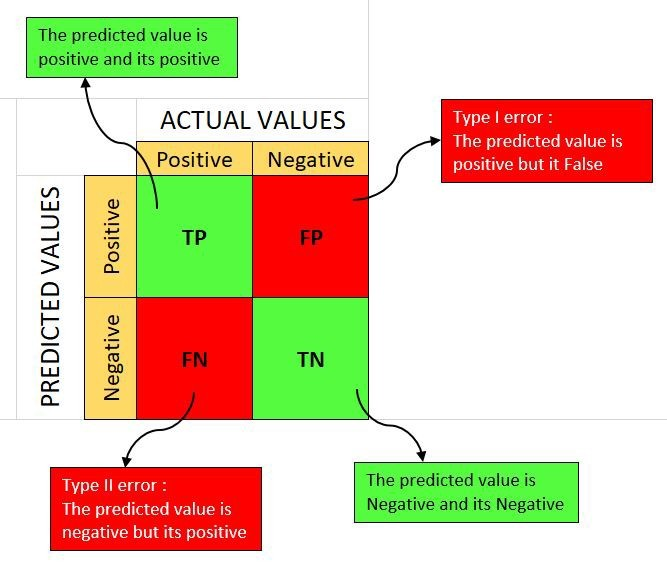

## SMOTE and MICE

SMOTE (Synthetic Minority Over-sampling Technique) and MICE (Multiple Imputation by Chained Equations) are two popular techniques used in data preprocessing and imputation respectively.

### SMOTE:

1. **When to Use SMOTE**:
   - SMOTE is used in scenarios where the dataset is imbalanced, meaning one class significantly outnumbers the other class.
   - It is commonly used in classification tasks, especially when the minority class (less represented class) is of particular interest, such as fraud detection, medical diagnosis, or rare event prediction.


2. **How SMOTE Works**:
   - SMOTE works by generating synthetic samples of the minority class to balance the dataset.
   - It selects a minority class sample and computes the k-nearest neighbors for that sample.
   - It then selects one of the nearest neighbors randomly and generates a synthetic sample at a random point between the selected sample and its chosen neighbor.
   - This process is repeated until the desired balance between the minority and majority classes is achieved.

### MICE:


1. **When to Use MICE**:
   - MICE is used to handle missing data in a dataset.
   - It is suitable for datasets where data is missing at random (MAR) or missing completely at random (MCAR) patterns.
   - MICE is commonly used in social sciences, clinical research, and epidemiology, where missing data is prevalent.


2. **How MICE Works**:
   - MICE imputes missing values by creating multiple imputations using chained equations.
   - It iteratively imputes missing values for each variable based on the observed values of other variables in the dataset.
   - In each iteration, MICE predicts missing values using regression models or other appropriate methods.
   - The imputation process is repeated multiple times, usually between 5 to 20 iterations, to generate multiple complete datasets with imputed values.
   - The final imputed dataset is created by pooling the multiple imputed datasets together.

In summary, SMOTE is used to address class imbalance by generating synthetic samples of the minority class, while MICE is used to impute missing values in datasets by creating multiple imputations based on observed data patterns. Both techniques are valuable tools in data preprocessing and can significantly improve the performance and reliability of machine learning models.

# Data Science Project Stages 

Let's dive deeper into each step of the data science process, including when to use different machine learning models:

1. **Collecting Data**:
   - Gather data from diverse sources such as databases, APIs, files, or web scraping.
   - Choose data that aligns with project objectives and ensure it's of high quality and relevance.

2. **Cleaning Data**:
   - Handle missing values, outliers, duplicates, and inconsistencies in the dataset.
   - Impute missing values using techniques like mean, median, mode, or advanced methods like MICE.
   - Detect and correct data entry errors or inconsistencies.
   - Standardize or normalize numerical features to a common scale to prevent biases.

3. **Exploratory Data Analysis (EDA)**:
   - Explore data distribution, correlations, and relationships between variables.
   - Visualize data using histograms, scatter plots, box plots, and correlation matrices.
   - Identify patterns, trends, and anomalies that inform further analysis.
   
Data encoding is an essential step in data preprocessing, especially when dealing with categorical variables. Here's the detailed information about data encoding:

### Data Encoding:
- **Categorical Variables**: Categorical variables are non-numeric variables that represent categories or groups.
- **Machine Learning Models**: Most machine learning algorithms require numeric input data, so categorical variables need to be converted into a numerical format before feeding them into models.

#### Techniques for Encoding Categorical Variables:

1. **One-Hot Encoding**:
   - Converts categorical variables into a binary format where each category becomes a new binary feature.
   - Creates a new binary column for each category, with a value of 1 indicating the presence of the category and 0 otherwise.
   - Suitable for nominal categorical variables (categories with no inherent order).
   - Avoids assigning ordinal relationships between categories.
   - Example: Encoding "Gender" with categories "Male", "Female", "Other" would create three binary columns.

2. **Label Encoding**:
   - Assigns a unique integer to each category in the variable.
   - Encodes ordinal categorical variables (categories with a natural ordering).
   - Not suitable for non-ordinal categorical variables as it may introduce unintended ordinal relationships.
   - Example: Encoding "Size" with categories "Small", "Medium", "Large" would assign integers 0, 1, and 2 respectively.

3. **Ordinal Encoding**:
   - Similar to label encoding but assigns integers based on the order of categories.
   - Preserves the ordinal relationship between categories.
   - Suitable for ordinal categorical variables.
   - Example: Encoding "Education Level" with categories "High School", "Bachelor's Degree", "Master's Degree" would assign integers based on the educational attainment level.

#### When to Apply Data Encoding:
- **One-Hot Encoding**: Use one-hot encoding for nominal categorical variables (categories with no inherent order) to avoid introducing unintended ordinal relationships.
- **Label Encoding**: Apply label encoding for ordinal categorical variables (categories with a natural ordering) when the order of categories matters.
- **Ordinal Encoding**: Use ordinal encoding for ordinal categorical variables to preserve the ordinal relationships between categories.

#### When Not to Apply Data Encoding:
- **One-Hot Encoding**: Avoid using one-hot encoding for ordinal categorical variables as it doesn't capture the ordinal relationships between categories.
- **Label Encoding**: Be cautious when applying label encoding to non-ordinal categorical variables as it may introduce unintended ordinal relationships between categories.
- **Ordinal Encoding**: Avoid using ordinal encoding for nominal categorical variables where there is no natural order among categories.

By appropriately encoding categorical variables, you ensure that the machine learning models can effectively interpret and utilize categorical information in the dataset, leading to more accurate and reliable predictions.

4. **Imputing Missing Values (MICE)**:
   - Apply MICE (Multiple Imputation by Chained Equations) to handle missing values, especially when missingness is not completely random.
   - Use MICE for datasets with complex missing data patterns or when preserving relationships between variables is crucial.

5. **Handling Imbalanced Data (SMOTE)**:
   - Apply SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance in classification tasks.
   - Use SMOTE when the minority class is underrepresented and improving classification performance is essential.

6. **Scaling Data**:
   - Scale numerical features to a common range using techniques like standardization (subtract mean, divide by standard deviation) or normalization (scale features to a range between 0 and 1).
   - Scaling helps prevent features with larger scales from dominating the model during training.

7. **Train-Test Split**:
   - Split the dataset into training and testing sets using a predefined ratio (e.g., 70-30, 80-20).
   - Ensure that the split maintains the distribution of target classes in classification tasks.
   - Avoid data leakage by ensuring that the testing set is not used during model training.

8. **Model Building**:
   - Choose appropriate machine learning algorithms based on the nature of the problem and data characteristics:
     - Linear Models: Logistic Regression (classification), Linear Regression (regression)
     - Tree-Based Models: Decision Trees, Random Forests, Gradient Boosting Machines
     - Support Vector Machines (SVM)
     - Neural Networks: Multi-layer Perceptron (MLP)
     - K-Nearest Neighbors (KNN)
     - Naive Bayes
   - Consider the interpretability, scalability, and complexity of the model when selecting algorithms.

9. **Model Evaluation**:
   - Evaluate model performance using appropriate metrics:
     - Classification: Accuracy, Precision, Recall, F1 Score, ROC Curve, AUC Score
     - Regression: Mean Absolute Error (MAE), Mean Squared Error (MSE), R-squared
   - Choose the best-performing model based on evaluation results and consider trade-offs between different metrics.

10. **Pickling**:
    - Serialize the trained model using pickle or joblib to save it as a binary file.
    - Pickling allows you to save the model's state, including parameters and trained weights, for later use or deployment.

11. **Deployment**:
    - Deploy the trained model in a production environment, such as a web application or API, for real-time predictions.
    - Monitor and update the deployed model regularly to maintain performance and accuracy.

When to Use Each ML Model:
- **Linear Models**: Suitable for problems with linear relationships between features and target variables. Often used for regression and binary classification tasks.
- **Tree-Based Models**: Effective for handling non-linear relationships and capturing complex patterns in the data. Useful for classification and regression tasks.
- **Support Vector Machines (SVM)**: Ideal for binary classification problems with complex decision boundaries. SVMs work well with high-dimensional data and can handle non-linear relationships using kernel tricks.
- **Neural Networks (MLP)**: Powerful for modeling complex and non-linear relationships in large datasets. Particularly effective for image recognition, natural language processing, and sequence prediction tasks.
- **K-Nearest Neighbors (KNN)**: Simple and intuitive for classification and regression tasks. KNN is effective when there's sufficient labeled data and the decision boundary is not complex.
- **Naive Bayes**: Suitable for text classification and spam filtering tasks. Naive Bayes assumes independence between features, making it fast and efficient for large datasets with many features.

By considering the characteristics of each machine learning model and the requirements of the problem at hand, you can select the most appropriate algorithms to achieve optimal performance in your data science projects.

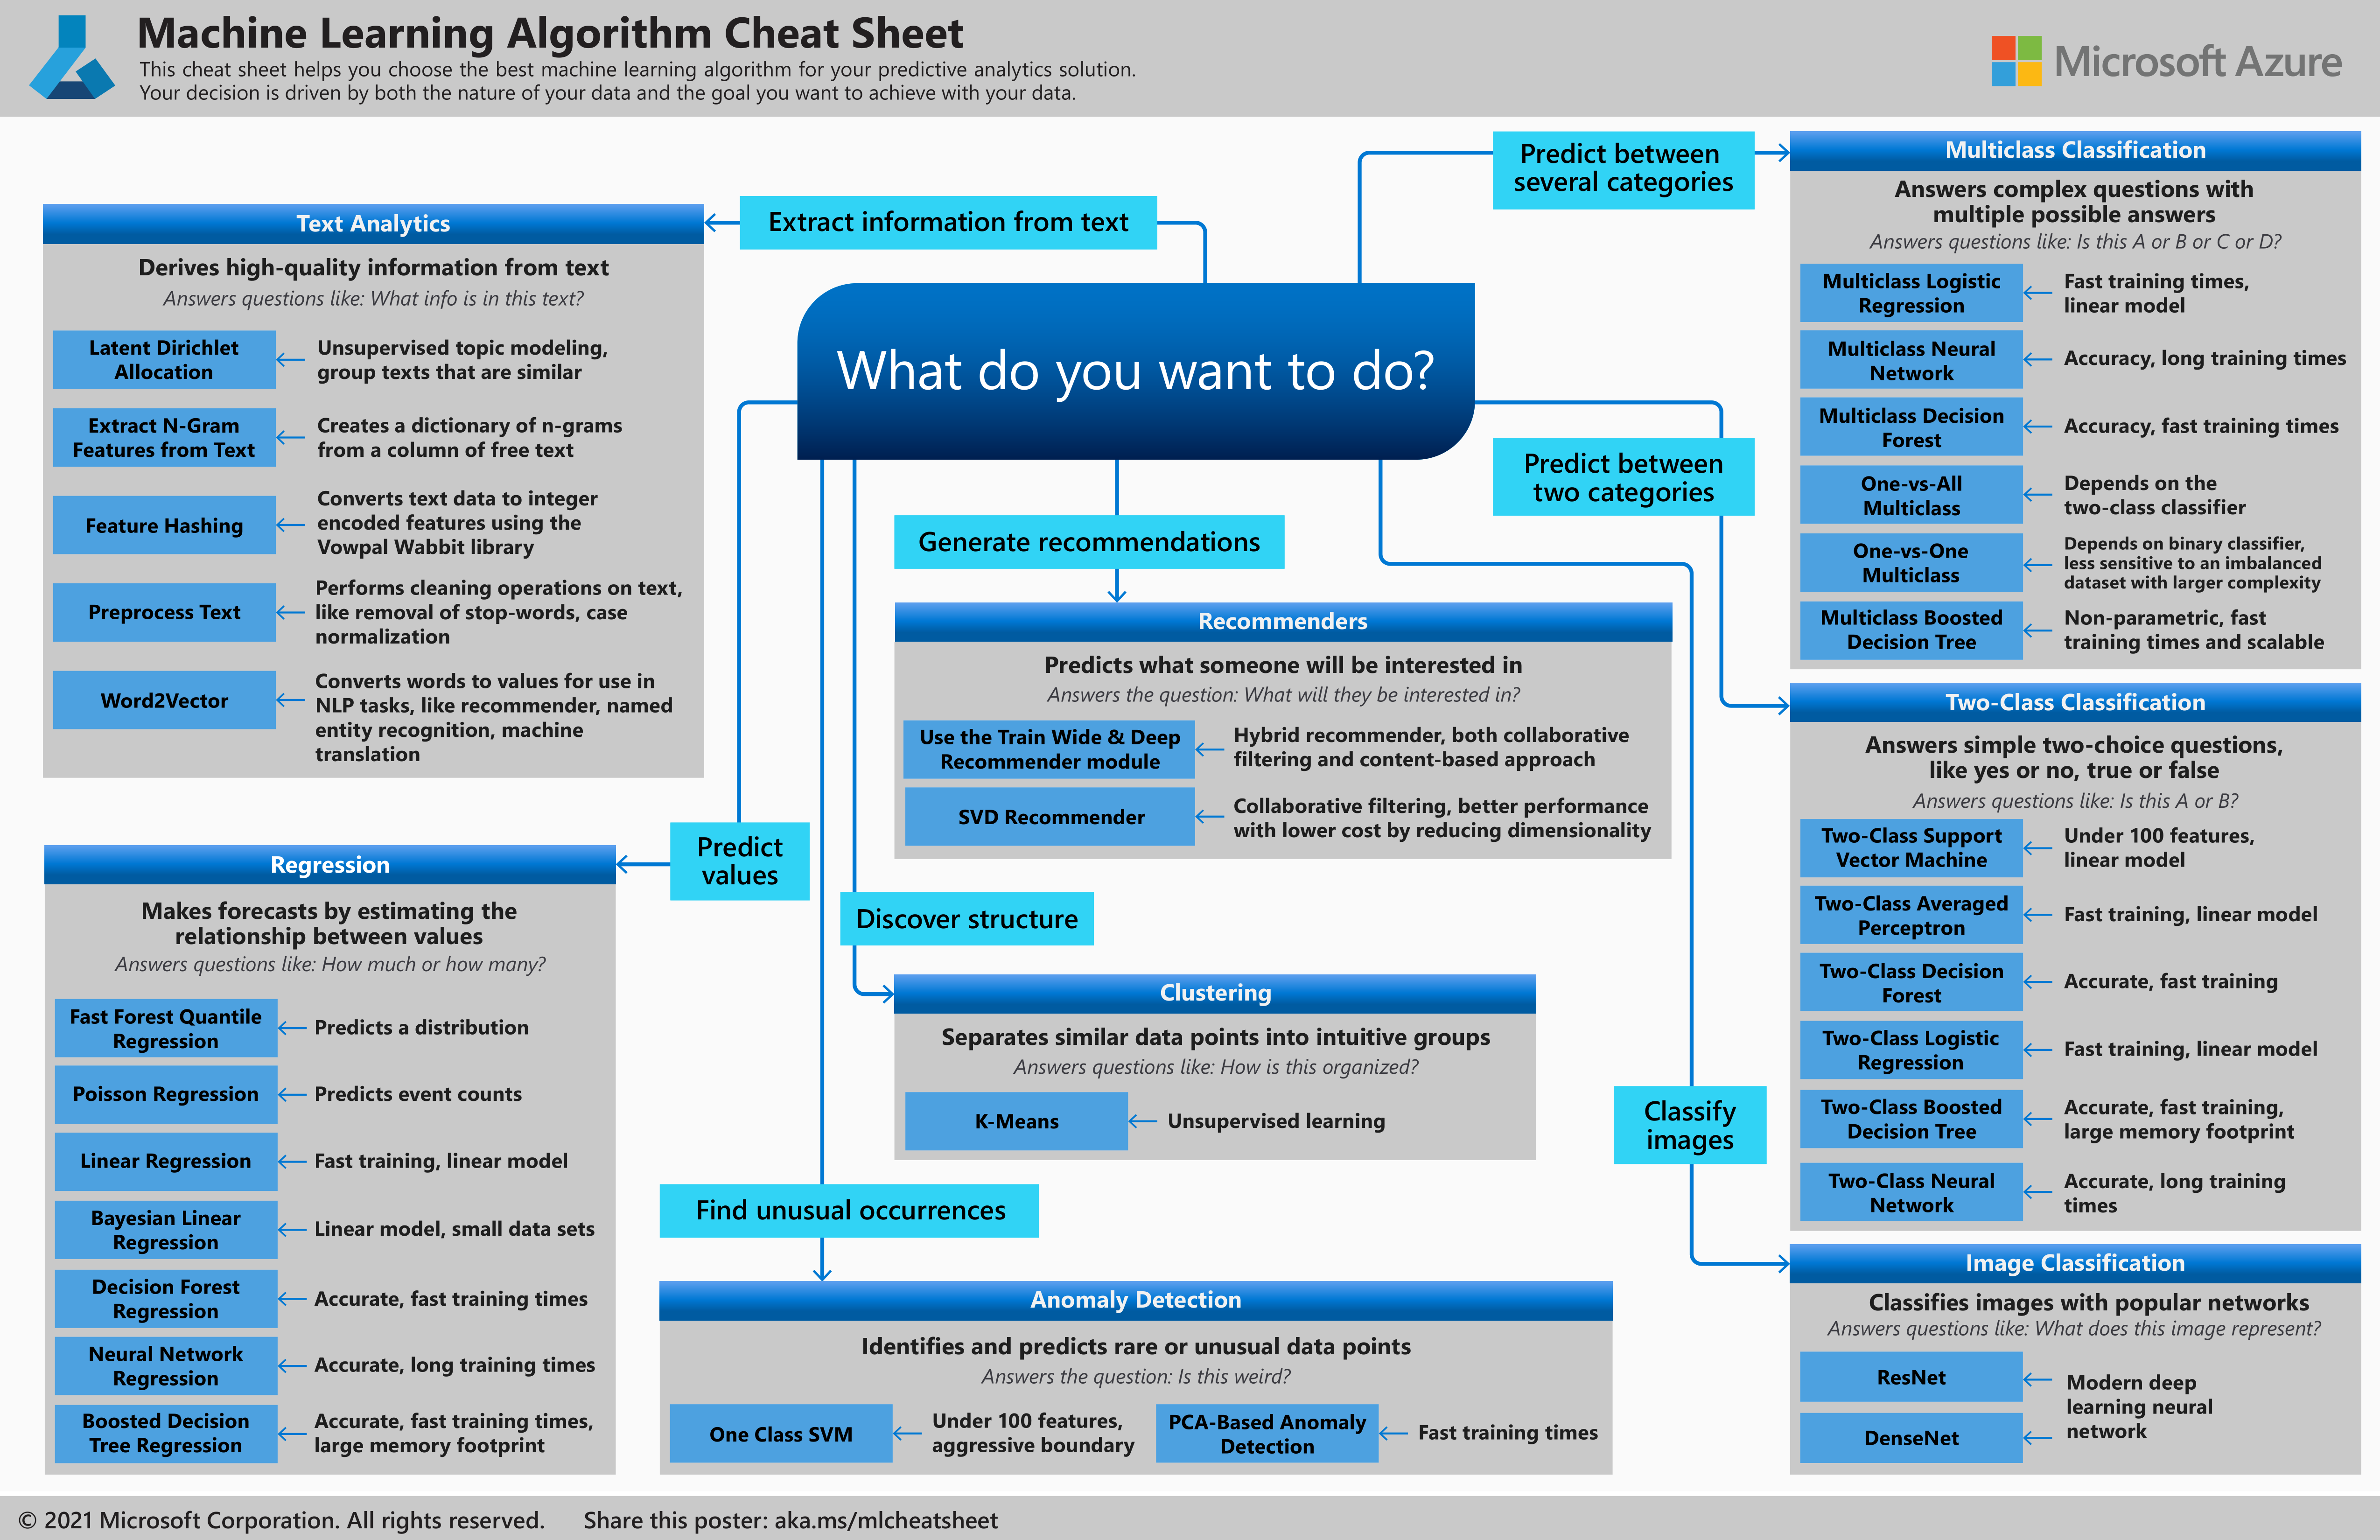

### Train-Test Split Logic:

1. **Logic**:
   - The primary goal of machine learning models is to generalize well to unseen data. Therefore, we need to evaluate the model's performance on data it hasn't seen during training.
   - The train-test split allows us to simulate real-world scenarios where the model encounters new, unseen data.

2. **Train Set**:
   - The training set is used to train the model's parameters. The model learns patterns, relationships, and features present in the training data.
   - The larger the training set, the better the model can learn from the available data.

3. **Test Set**:
   - The test set is held out from the model during training and is used to evaluate its performance after training.
   - By evaluating the model on unseen data, we get an estimate of its generalization ability and how well it performs on new, unseen examples.

4. **Validation Set**:
   - The validation set is an additional subset of the data used during the model training process, primarily for hyperparameter tuning and model selection.
   - It helps prevent overfitting by providing an independent dataset for model evaluation and parameter optimization.
   - The validation set's performance metrics guide the selection of the best-performing model architecture and hyperparameters.

### Real-Life Data Science Example:

**Scenario**: Predicting House Prices

**Explanation**:
- **Data Collection**: Suppose we have a dataset containing information about houses, including features like size, number of bedrooms, location, and price.
- **Train-Test Split**: We divide the dataset into a training set (e.g., 70% of the data) and a test set (e.g., 30% of the data).
- **Training**: We use the training set to train our machine learning model to predict house prices based on the features provided.
- **Validation (Optional)**: We might use a validation set for hyperparameter tuning and model selection, iterating over different model architectures, and hyperparameters to find the optimal combination.
- **Testing**: Once the model is trained, we evaluate its performance on the test set, which contains unseen data. We calculate metrics such as mean squared error (MSE) or root mean squared error (RMSE) to assess how well the model generalizes to new, unseen houses.
- **Generalization**: If the model performs well on the test set, we can have confidence that it will likely perform well on new houses that it hasn't seen during training.

### Conclusion:

The train-test split is a critical technique in machine learning and data science for evaluating model performance and ensuring that models generalize well to new, unseen data. By using separate training, validation, and testing sets, we can develop and validate robust models that accurately predict outcomes in real-world scenarios.

### Cross Validation:

Cross-validation is a resampling technique used to assess the performance of a predictive model. It helps estimate how the model will generalize to an independent dataset by iteratively splitting the available data into training and validation sets.

#### Types of Cross Validation:

1. **K-Fold Cross Validation**:
   - **Procedure**: The dataset is divided into k folds of approximately equal size. The model is trained k times, each time using k-1 folds for training and the remaining fold for validation.
   - **Advantages**:
     - Provides a more robust estimate of model performance compared to a single train-test split.
     - Utilizes the entire dataset for training and validation, reducing bias.
   - **Disadvantages**:
     - Computationally expensive, especially for large datasets or complex models.
     - May result in high variance depending on the choice of k.

2. **Stratified K-Fold Cross Validation**:
   - **Procedure**: Similar to k-fold cross-validation, but ensures that each fold contains approximately the same proportion of target classes as the original dataset.
   - **Advantages**:
     - Suitable for imbalanced datasets where the distribution of target classes is uneven.
     - Provides more reliable estimates of model performance for classification tasks.
   - **Disadvantages**:
     - May be less effective for regression tasks or when the target variable is continuous.

3. **Leave-One-Out Cross Validation (LOOCV)**:
   - **Procedure**: Each observation in the dataset is used as the validation set once, while the rest of the data is used for training.
   - **Advantages**:
     - Provides a nearly unbiased estimate of model performance.
     - Suitable for small datasets or when computational resources are limited.
   - **Disadvantages**:
     - Can be computationally expensive, especially for large datasets.
     - Variance of the estimate may be high, leading to instability in results.

4. **Leave-P-Out Cross Validation**:
   - **Procedure**: Similar to LOOCV but leaves p observations out for validation, rather than just one.
   - **Advantages**:
     - Less computationally intensive compared to LOOCV, while still providing a reliable estimate of model performance.
     - Allows for fine-tuning the trade-off between computational cost and variance in the estimate.
   - **Disadvantages**:
     - Still requires considerable computational resources, especially for large p values.
     - May not be suitable for highly imbalanced datasets or when p is chosen arbitrarily.

#### Advantages and Disadvantages of Cross Validation:

- **Advantages**:
  - Provides a more accurate estimate of model performance compared to a single train-test split.
  - Reduces the risk of overfitting by evaluating the model on multiple validation sets.
  - Utilizes the entire dataset for training and validation, maximizing data efficiency.
- **Disadvantages**:
  - Can be computationally expensive, especially for large datasets or complex models.
  - May result in high variance, particularly with small sample sizes or when the dataset is highly imbalanced.
  - Requires careful consideration of the appropriate cross-validation strategy based on the characteristics of the dataset and the modeling task.

In summary, cross-validation is a valuable technique for assessing the performance of predictive models, but it's essential to choose the appropriate type of cross-validation based on the specific requirements and constraints of the problem at hand. Each type of cross-validation has its advantages and disadvantages, and understanding these can help researchers and practitioners make informed decisions when evaluating model performance.

# Logistic Regression-1 Assignment

### Q1. Explain the difference between linear regression and logistic regression models. Provide an example of a scenario where logistic regression would be more appropriate.

Linear regression and logistic regression are both techniques used in statistical modeling, but they serve different purposes and are applied in distinct scenarios:

1. **Linear Regression**:
   - Linear regression is used when the target variable (the variable we want to predict) is continuous.
   - It assumes a linear relationship between the independent variables (features) and the dependent variable (target).
   - The output of linear regression is a continuous value, which can be any real number.
   - Linear regression is commonly used for tasks like predicting house prices, stock prices, or any other continuous numerical outcome.

2. **Logistic Regression**:
   - Logistic regression is used when the target variable is categorical, typically binary (e.g., yes/no, 0/1, true/false).
   - It models the probability that a given instance belongs to a particular category.
   - Logistic regression applies a logistic function (sigmoid function) to the linear combination of input features.
   - The output of logistic regression is a probability between 0 and 1, which can be interpreted as the likelihood of an instance belonging to a particular class.
   - Logistic regression is widely used in binary classification problems such as spam detection, disease diagnosis (e.g., presence or absence of a disease), and credit risk analysis (e.g., default or non-default).

**Example scenario where logistic regression would be more appropriate**:

Consider a scenario where a hospital wants to predict whether patients entering the emergency room are at high risk for heart attacks. The dataset contains various features such as age, blood pressure, cholesterol levels, and whether the patient has a history of heart disease.

Here, the target variable is whether the patient is at high risk for a heart attack, which is a binary outcome (high risk or not high risk). Logistic regression would be more appropriate in this scenario because:
- The target variable is categorical (high risk or not high risk).
- Logistic regression can output the probability of a patient being at high risk, which helps in making informed decisions.
- Logistic regression models the relationship between the patient's features and the likelihood of being at high risk for a heart attack.

In summary, logistic regression is suitable for binary classification problems where the outcome is categorical, while linear regression is used for predicting continuous outcomes.

### Q2. What is the cost function used in logistic regression, and how is it optimized?

In logistic regression, the cost function used is the **logarithmic loss function**, also known as the **cross-entropy loss function**. This function is used to measure the difference between the predicted probabilities of the model and the actual binary outcomes.

Let's define the key components:

- $( m )$ : The number of training examples.
- $( y )$: The actual binary outcome (0 or 1).
- $( h_\theta(x) )$: The predicted probability that $( y = 1 )$ given $( x )$, parameterized by $( \theta )$, which is the logistic function: $( h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}} )$.

The cost function $( J(\theta) )$ for logistic regression is given by:

$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)}))] ]$

The first term $( y^{(i)}\log(h_\theta(x^{(i)})) )$ penalizes the model when the actual outcome is 1 and the predicted probability of it being 1 is low. Similarly, the second term $( (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})) )$ penalizes the model when the actual outcome is 0 and the predicted probability of it being 1 (the complementary of it being 0) is high.

The goal is to minimize this cost function to improve the model's predictive accuracy.

To optimize the cost function and find the optimal parameters $( \theta )$, typically gradient descent or some of its variants are used. The gradient descent algorithm iteratively updates the parameters in the opposite direction of the gradient of the cost function with respect to the parameters. The update rule for gradient descent in logistic regression is:

$[ \theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}]$

Where:
- $( \alpha )$ is the learning rate, a hyperparameter that controls the size of the steps taken during the optimization process.
- $( \frac{\partial J(\theta)}{\partial \theta_j} )$ represents the partial derivative of the cost function with respect to the parameter \( \theta_j )$.

The process continues iteratively until convergence, meaning until the algorithm reaches a point where further iterations do not significantly decrease the cost function or until a predefined number of iterations is reached. Upon convergence, the parameters $( \theta )$ represent the optimal values that minimize the cost function and produce the best-fitted logistic regression model for the given training data.

### Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.

Regularization is a technique used to prevent overfitting in machine learning models by adding a penalty term to the cost function. In logistic regression, regularization is commonly achieved through two types: L1 regularization (Lasso) and L2 regularization (Ridge).

In logistic regression, the cost function without regularization is given by:

$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})) $

Regularization is incorporated by adding a regularization term to the cost function, which penalizes large parameter values. The regularized cost function for logistic regression with both L1 and L2 regularization is expressed as:

$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)}))] + \lambda \sum_{j=1}^{n} \theta_j^2 $

where $( \lambda )$ is the regularization parameter, which controls the degree of regularization applied to the model. The larger the value of $( \lambda )$, the stronger the regularization. $( n )$ is the number of features, and $( \theta_j )$ represents the model parameters.

**L1 regularization**:
- L1 regularization adds the sum of the absolute values of the coefficients to the cost function. It encourages sparsity in the model by driving some of the coefficients to exactly zero.
- L1 regularization can be beneficial when there are many irrelevant features, as it effectively performs feature selection by setting some coefficients to zero.

**L2 regularization**:
- L2 regularization adds the sum of the squared values of the coefficients to the cost function. It tends to penalize large coefficients more gently than L1 regularization.
- L2 regularization is particularly useful when all features are potentially relevant, as it helps prevent overfitting by constraining the magnitude of the coefficients.

Regularization helps prevent overfitting by discouraging overly complex models that fit the training data too closely. By penalizing large parameter values, regularization encourages the model to generalize well to unseen data. It helps strike a balance between bias and variance, leading to more robust and generalizable models that perform better on unseen data. The choice between L1 and L2 regularization, as well as the appropriate regularization parameter \( \lambda \), depends on the specific characteristics of the dataset and the problem at hand.

### Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression model?

The ROC (Receiver Operating Characteristic) curve is a graphical representation that illustrates the performance of a binary classification model across various threshold settings. It plots the true positive rate (TPR) against the false positive rate (FPR) at different threshold values.

Here are the key components used in constructing an ROC curve:

- **True Positive Rate (TPR)**, also known as sensitivity or recall, is the proportion of actual positive cases that are correctly identified by the model. It is calculated as:
  $ \text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$

- **False Positive Rate (FPR)** is the proportion of actual negative cases that are incorrectly classified as positive by the model. It is calculated as:
  $ \text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}} $

In logistic regression, the model outputs probabilities of an instance belonging to the positive class (class 1). By varying the threshold for classification, we can adjust how these probabilities are converted into actual class predictions.

To create an ROC curve and evaluate the performance of a logistic regression model, the following steps are typically followed:

1. **Calculate Predicted Probabilities**: Use the trained logistic regression model to predict probabilities for each instance in the test dataset.

2. **Adjust Thresholds**: Use different threshold values to convert these probabilities into class predictions (e.g., 0.5, 0.6, 0.7, etc.).

3. **Compute TPR and FPR**: For each threshold value, calculate the TPR and FPR based on the true labels and the model predictions.

4. **Plot the ROC Curve**: Plot the FPR on the x-axis and the TPR on the y-axis to create the ROC curve.

5. **Evaluate the Model**: The ROC curve visually represents the trade-off between TPR and FPR. A diagonal line from the origin (0,0) to (1,1) represents random guessing. A good classifier should have an ROC curve that is closer to the top-left corner, indicating high TPR and low FPR across various threshold settings.

6. **Calculate Area Under the Curve (AUC)**: The AUC represents the area under the ROC curve. A perfect classifier would have an AUC of 1.0, while a completely random classifier would have an AUC of 0.5. The higher the AUC, the better the model's performance.

By examining the ROC curve and calculating the AUC, we can assess the discriminative ability of the logistic regression model across different threshold values and compare its performance with other models. ROC curves are especially useful in evaluating binary classifiers when the class distribution is imbalanced or when the costs of false positives and false negatives differ.

### Q5. What are some common techniques for feature selection in logistic regression? How do these techniques help improve the model's performance?

Feature selection is crucial in logistic regression to improve model performance, reduce overfitting, and enhance interpretability. Here are some common techniques for feature selection in logistic regression:

1. **Univariate Feature Selection**:
   - Univariate feature selection techniques evaluate each feature individually based on certain statistical tests such as chi-square test, ANOVA, or mutual information score.
   - Features are ranked according to their scores, and the top-ranking features are selected for the model.
   - This method is simple and computationally efficient but may overlook the interactions between features.

2. **Recursive Feature Elimination (RFE)**:
   - RFE recursively removes features from the dataset and fits the model with the remaining features.
   - It ranks features based on their importance and eliminates the least important features.
   - This process continues until the desired number of features is reached or until the model performance no longer improves.
   - RFE is effective for identifying the most relevant features but can be computationally intensive, especially for large datasets.

3. **L1 Regularization (Lasso)**:
   - L1 regularization adds a penalty term to the logistic regression cost function that encourages sparsity in the model.
   - It automatically performs feature selection by driving some coefficients to zero, effectively eliminating irrelevant features.
   - Lasso regularization helps in identifying the most important features and simplifying the model.

4. **Principal Component Analysis (PCA)**:
   - PCA is a dimensionality reduction technique that transforms the original features into a new set of orthogonal features (principal components).
   - The principal components capture the maximum variance in the data while reducing dimensionality.
   - Although PCA doesn't explicitly select features, it can be used as a preprocessing step to reduce the number of features before applying logistic regression.

5. **Forward and Backward Selection**:
   - Forward selection starts with an empty set of features and iteratively adds the most significant feature at each step until a stopping criterion is met.
   - Backward selection starts with all features and removes the least significant feature at each step until a stopping criterion is met.
   - These methods consider the predictive power of features in combination and are more computationally intensive compared to univariate methods.

These techniques help improve the logistic regression model's performance by:
- Reducing the risk of overfitting by eliminating irrelevant or redundant features.
- Enhancing model interpretability by focusing on the most important features.
- Improving computational efficiency by reducing the dimensionality of the feature space.
- Enhancing generalization performance by selecting features that are most relevant to the target variable, thus reducing noise in the data.

### Q6. How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing with class imbalance?

Handling imbalanced datasets is essential in logistic regression to prevent the model from being biased towards the majority class and to ensure accurate predictions for both classes. Here are some strategies for dealing with class imbalance in logistic regression:

1. **Resampling Techniques**:
   - **Random Undersampling**: Randomly remove instances from the majority class to balance the class distribution. This approach may lead to information loss.
   - **Random Oversampling**: Randomly duplicate instances from the minority class to increase its representation. However, this may result in overfitting.
   - **SMOTE (Synthetic Minority Over-sampling Technique)**: Generate synthetic samples for the minority class by interpolating between existing minority class instances. This method helps address class imbalance without replicating existing instances.

2. **Algorithmic Techniques**:
   - **Class Weighting**: Assign different weights to classes during model training to penalize misclassifications of the minority class more heavily. In logistic regression, class weights can be adjusted using the `class_weight` parameter.
   - **Cost-Sensitive Learning**: Introduce costs for misclassifying instances from different classes. This encourages the model to prioritize correctly classifying instances from the minority class.

3. **Evaluation Metrics**:
   - Use evaluation metrics that are robust to class imbalance, such as precision, recall, F1-score, and area under the ROC curve (AUC-ROC).
   - Precision and recall provide insights into the model's ability to correctly identify instances of the minority class.
   - AUC-ROC measures the model's ability to discriminate between positive and negative instances regardless of class distribution.

4. **Ensemble Methods**:
   - Utilize ensemble learning techniques such as Random Forest, Gradient Boosting Machines (GBMs), or AdaBoost, which inherently handle class imbalance by aggregating predictions from multiple models.
   - These methods combine multiple weak learners to create a strong learner, which can effectively capture patterns from imbalanced datasets.

5. **Data-Level Strategies**:
   - Collect more data for the minority class if feasible to improve its representation in the dataset.
   - Perform data augmentation techniques such as synthetic data generation, feature engineering, or minority class oversampling to enrich the dataset.

6. **Stratified Sampling**:
   - Use stratified sampling techniques to ensure that the training, validation, and test sets maintain the same class distribution as the original dataset. This prevents the model from being biased towards the majority class during training and evaluation.

By employing these strategies, logistic regression models can better handle imbalanced datasets and produce more reliable predictions, especially for minority class instances. The choice of strategy depends on the specific characteristics of the dataset and the requirements of the problem at hand.

### Q7. Can you discuss some common issues and challenges that may arise when implementing logistic regression, and how they can be addressed? For example, what can be done if there is multicollinearity among the independent variables?

Implementing logistic regression may encounter various challenges, and it's crucial to address them effectively to build robust and reliable models. Here are some common issues and challenges that may arise when implementing logistic regression and strategies to address them:

1. **Multicollinearity**:
   - Multicollinearity occurs when independent variables in the model are highly correlated with each other, which can lead to unstable coefficient estimates.
   - To address multicollinearity:
     - Use techniques like variance inflation factor (VIF) analysis to identify highly correlated variables and remove or combine them.
     - Regularization techniques like ridge regression (L2 regularization) can help mitigate the effects of multicollinearity by penalizing large coefficients.

2. **Overfitting**:
   - Overfitting occurs when the model learns the noise and randomness in the training data, leading to poor generalization to unseen data.
   - To prevent overfitting:
     - Use techniques like cross-validation to assess the model's performance on unseen data and select the best hyperparameters.
     - Regularization techniques like ridge (L2) or lasso (L1) regression penalize large coefficients, preventing the model from fitting the noise in the data.
     - Collect more data if possible, as larger datasets can help reduce overfitting by providing more diverse examples for the model to learn from.

3. **Underfitting**:
   - Underfitting occurs when the model is too simple to capture the underlying patterns in the data, resulting in poor performance on both training and test sets.
   - To address underfitting:
     - Increase the complexity of the model by adding more features, polynomial features, or interaction terms.
     - Use more flexible models such as decision trees, random forests, or support vector machines (SVMs) if logistic regression is too restrictive for the problem.

4. **Imbalanced Classes**:
   - Imbalanced class distributions can lead to biased models that perform poorly on minority classes.
   - To handle imbalanced classes:
     - Use techniques like oversampling (e.g., SMOTE) or undersampling to balance the class distribution in the training data.
     - Adjust class weights during model training to penalize misclassifications of the minority class more heavily.
     - Choose evaluation metrics like precision, recall, F1-score, or AUC-ROC that are robust to class imbalance.

5. **Outliers**:
   - Outliers can significantly affect the coefficient estimates and model performance in logistic regression.
   - To deal with outliers:
     - Use robust regression techniques that are less sensitive to outliers, such as robust logistic regression or robust standard errors.
     - Apply data transformation techniques like winsorization to cap extreme values or remove outliers from the dataset.

Addressing these common issues and challenges effectively can help improve the performance and reliability of logistic regression models in various applications. It's essential to carefully preprocess the data, select appropriate features, and tune model parameters to build accurate and interpretable models.

## Logistic Regression 2 Assignment

### Q1. What is the purpose of grid search cv in machine learning, and how does it work?

Grid search cross-validation (GridSearchCV) is a technique used in machine learning to find the optimal hyperparameters for a given model. The purpose of grid search CV is to systematically search through a predefined hyperparameter grid and evaluate the model's performance using cross-validation to identify the best combination of hyperparameters.

Here's how grid search CV works:

1. **Define the Hyperparameter Grid**: Specify a set of hyperparameters and their corresponding values that you want to tune. This creates a grid of hyperparameter combinations to explore.

2. **Cross-Validation**: Divide the dataset into multiple folds (typically k-folds), where each fold serves as a training set and a validation set. For each combination of hyperparameters in the grid:
   - The model is trained on the training folds.
   - The performance of the model is evaluated on the validation fold.
   - This process is repeated for each fold, resulting in k performance scores for each hyperparameter combination.

3. **Model Evaluation**: Compute the average performance score across all folds for each hyperparameter combination. The performance metric could be accuracy, precision, recall, F1-score, or any other relevant metric depending on the problem.

4. **Select the Best Hyperparameters**: Choose the hyperparameter combination that yields the highest average performance score across all folds.

5. **Model Training**: Train the model using the selected optimal hyperparameters on the entire training dataset (without splitting into folds).

6. **Model Evaluation on Test Data**: Finally, evaluate the model's performance on a separate test dataset to assess its generalization ability.

Grid search CV systematically explores the hyperparameter space to find the combination that results in the best model performance. It helps avoid the need for manual tuning, which can be time-consuming and prone to bias. Additionally, by using cross-validation, grid search CV provides a more reliable estimate of the model's performance compared to a single train-test split.

However, grid search CV can be computationally expensive, especially for models with a large number of hyperparameters or a large dataset. As an alternative, randomized search cross-validation (RandomizedSearchCV) can be used, which randomly selects hyperparameter combinations from a predefined distribution, reducing the computational burden while still providing good hyperparameter tuning results.

### Q2. Describe the difference between grid search cv and randomize search cv, and when might you choose one over the other?

Both Grid Search CV and Randomized Search CV are techniques used for hyperparameter tuning in machine learning, but they differ in how they search through the hyperparameter space. Here are the key differences between the two methods:

1. **Search Strategy**:
   - **Grid Search CV**: Exhaustively searches through all possible combinations of hyperparameter values specified in a predefined grid. It evaluates the model's performance for each combination using cross-validation.
   - **Randomized Search CV**: Randomly samples a fixed number of hyperparameter combinations from specified probability distributions. It evaluates the model's performance for each randomly chosen combination using cross-validation.

2. **Exploration of Hyperparameter Space**:
   - **Grid Search CV**: Tries every combination in the predefined grid, ensuring a comprehensive exploration of the hyperparameter space. This can be computationally expensive, especially with a large number of hyperparameters or a large search space.
   - **Randomized Search CV**: Efficiently explores a subset of the hyperparameter space by randomly sampling combinations. This can be advantageous when the hyperparameter space is vast, and an exhaustive search is impractical or too time-consuming.

3. **Computational Cost**:
   - **Grid Search CV**: Can be computationally expensive, especially when the hyperparameter space is large, as it tests all possible combinations.
   - **Randomized Search CV**: Is generally less computationally demanding since it randomly samples a predefined number of combinations.

4. **Suitability for Different Scenarios**:
   - **Grid Search CV**: Well-suited for smaller hyperparameter spaces or when there is a belief that specific combinations are more likely to perform well. It is also suitable when computational resources are not a significant constraint.
   - **Randomized Search CV**: Particularly useful when the hyperparameter space is extensive and a broad exploration is needed. It is also beneficial when computational resources are limited, as it provides a good compromise between exploration and efficiency.

5. **Flexibility**:
   - **Grid Search CV**: May struggle with continuous or large hyperparameter spaces as it requires predefined values.
   - **Randomized Search CV**: Is more flexible, allowing the specification of probability distributions for continuous hyperparameters.

6. **Outcome**:
   - Both methods aim to find the optimal hyperparameters that result in the best model performance. The difference lies in their approach to exploring the hyperparameter space.

In summary, the choice between Grid Search CV and Randomized Search CV depends on the specific characteristics of the problem, the size of the hyperparameter space, and the available computational resources. Grid Search CV is more exhaustive but can be computationally demanding, while Randomized Search CV is more efficient but might not guarantee an exhaustive search. Randomized Search CV is often preferred in scenarios where computational resources are limited, or when the hyperparameter space is vast and exhaustive search is impractical.

### Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.

Data leakage refers to the unintentional incorporation of information from the validation or test dataset into the training dataset during model development. It occurs when features or information that would not be available at the time of prediction are included in the training process, leading to overly optimistic performance estimates and misleading results.

Data leakage is a significant problem in machine learning for several reasons:

1. **Overestimation of Model Performance**: Data leakage can artificially inflate the performance metrics of the model during training, making it appear more accurate than it actually is. As a result, the model may fail to generalize well to unseen data.

2. **Invalidation of Model Generalization**: Models trained with leaked data may perform well on the validation or test sets but fail to generalize to real-world data, as they have learned patterns that are specific to the leaked information.

3. **Misleading Insights**: Data leakage can lead to incorrect conclusions and misleading insights about the relationships between features and the target variable, as the model may learn from spurious correlations introduced by the leaked information.

4. **Loss of Trust**: Models affected by data leakage may produce unreliable predictions, eroding trust in the model and undermining its utility in real-world applications.

Example of Data Leakage:

Let's consider an example of predicting credit card defaults. Suppose the dataset includes a feature indicating the current balance of the credit card account. Additionally, there is a binary target variable indicating whether the cardholder defaulted on their payments.

Now, imagine that the dataset also contains a feature indicating the payment status for the current month, including whether the payment was made on time or not. If the model includes this feature in the training process, it effectively leaks information about the target variable to the model.

In this scenario, the payment status for the current month is highly correlated with the target variable (default status), as individuals who defaulted on their payments are likely to have missed the payment for the current month. By including this feature in the model, the model learns to rely on information that would not be available at the time of prediction, leading to data leakage.

To prevent data leakage in this example, the feature indicating the payment status for the current month should be removed from the training dataset, ensuring that the model learns only from features that would be available at the time of prediction. Additionally, rigorous feature engineering and validation techniques should be employed to identify and mitigate any sources of potential data leakage.

### Q4. How can you prevent data leakage when building a machine learning model?

Preventing data leakage is crucial to ensure the integrity and generalization ability of machine learning models. Here are several strategies to prevent data leakage when building a machine learning model:

1. **Understand the Problem Domain**: Gain a deep understanding of the problem domain and the data generation process. Identify potential sources of data leakage and how they might affect the modeling process.

2. **Separate Data Sources**: Clearly delineate between training, validation, and test datasets. Ensure that no information from the validation or test datasets leaks into the training dataset during preprocessing or feature engineering.

3. **Feature Engineering**: Be cautious when engineering features and avoid using information that would not be available at the time of prediction. Remove features that directly or indirectly leak information about the target variable.

4. **Cross-Validation**: Use appropriate cross-validation techniques, such as stratified k-fold cross-validation, to evaluate model performance robustly. Ensure that data leakage does not occur during the cross-validation process by applying preprocessing steps within each fold separately.

5. **Temporal Validation**: When working with time-series data, employ temporal validation techniques that respect the chronological order of the data. Ensure that information from future time periods does not leak into the training set.

6. **Holdout Set**: Set aside a holdout set or test set that is completely independent of the training and validation datasets. Use this set to assess the model's performance on unseen data.

7. **Regularization**: Apply regularization techniques, such as L1 or L2 regularization, to penalize overly complex models and reduce the risk of overfitting. Regularization can help mitigate the effects of data leakage by discouraging the model from relying too heavily on noisy or irrelevant features.

8. **Pipeline Construction**: Construct data preprocessing pipelines that encapsulate all preprocessing steps, including feature scaling, imputation, and encoding. Ensure that these pipelines are applied consistently to the training, validation, and test datasets to avoid discrepancies and potential sources of data leakage.

9. **Feature Selection**: Use principled methods for feature selection, such as univariate feature selection or recursive feature elimination, to identify relevant features while minimizing the risk of data leakage.

10. **Data Privacy and Security**: Implement robust data privacy and security measures to protect sensitive information and prevent unauthorized access or leakage of confidential data.

By following these best practices and being vigilant throughout the model development process, data scientists can effectively prevent data leakage and build models that generalize well to unseen data.

### Q5. What is a confusion matrix, and what does it tell you about the performance of a classification model?

A confusion matrix is a table that allows visualization of the performance of a classification model by summarizing the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by the model on a dataset. It provides a clear overview of how well the model is performing in terms of correct and incorrect predictions for each class.

Here's how a confusion matrix is structured:

- **True Positive (TP)**: Instances that are actually positive and are correctly classified as positive by the model.
- **True Negative (TN)**: Instances that are actually negative and are correctly classified as negative by the model.
- **False Positive (FP)**: Instances that are actually negative but are incorrectly classified as positive by the model (Type I error).
- **False Negative (FN)**: Instances that are actually positive but are incorrectly classified as negative by the model (Type II error).

The confusion matrix is typically represented as follows:

$
\begin{matrix}
 & \text{Predicted Negative} & \text{Predicted Positive} \\
\text{Actual Negative} & TN & FP \\
\text{Actual Positive} & FN & TP \\
\end{matrix}
$

From the confusion matrix, several performance metrics can be derived to evaluate the classification model:

1. **Accuracy**: The proportion of correct predictions made by the model, calculated as $((TP + TN) / (TP + TN + FP + FN))$. It measures the overall effectiveness of the model.

2. **Precision**: The proportion of true positive predictions among all positive predictions made by the model, calculated as $(TP / (TP + FP))$. It measures the model's ability to avoid false positive predictions.

3. **Recall (Sensitivity)**: The proportion of true positive predictions among all actual positive instances, calculated as $(TP / (TP + FN))$. It measures the model's ability to identify all positive instances.

4. **F1-Score**: The harmonic mean of precision and recall, calculated as $(2 \times (Precision \times Recall) / (Precision + Recall))$. It provides a balance between precision and recall.

5. **Specificity**: The proportion of true negative predictions among all actual negative instances, calculated as $(TN / (TN + FP))$. It measures the model's ability to identify all negative instances.

By examining the values in the confusion matrix and computing these performance metrics, we can gain insights into the strengths and weaknesses of the classification model and make informed decisions about its effectiveness for the given task.

### Q6. Explain the difference between precision and recall in the context of a confusion matrix.

Precision and recall are two important metrics used to evaluate the performance of classification models, especially in scenarios where class imbalance exists. They are derived from the confusion matrix, which summarizes the model's predictions compared to the actual labels.

Here's a brief explanation of precision and recall in the context of a confusion matrix:

1. **Precision**:
   - Precision measures the proportion of true positive predictions among all positive predictions made by the model.
   - It answers the question: "Of all the instances predicted as positive, how many were actually positive?"
   - Precision is calculated as $( \frac{TP}{TP + FP} )$, where TP is the number of true positives and FP is the number of false positives.
   - High precision indicates that the model has a low rate of false positives, meaning that when it predicts a positive instance, it is likely to be correct.

2. **Recall (Sensitivity)**:
   - Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
   - It answers the question: "Of all the actual positive instances, how many did the model correctly predict as positive?"
   - Recall is calculated as $( \frac{TP}{TP + FN} )$, where TP is the number of true positives and FN is the number of false negatives.
   - High recall indicates that the model effectively captures most of the positive instances in the dataset, minimizing false negatives.

In summary:
- Precision focuses on the accuracy of positive predictions made by the model, emphasizing the minimization of false positives.
- Recall emphasizes the model's ability to correctly identify all positive instances in the dataset, minimizing false negatives.

Depending on the specific requirements of the classification task, one metric may be more important than the other. For example, in a medical diagnosis scenario, high recall is crucial to ensure that all positive cases are correctly identified, even if it results in some false positives (lower precision). Conversely, in a spam email detection system, high precision is often more desirable to minimize the number of legitimate emails incorrectly classified as spam, even if it means some spam emails are missed (lower recall).

### Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?

Interpreting a confusion matrix provides valuable insights into the types of errors that a classification model is making. By examining the values in the confusion matrix, we can identify the nature and frequency of different types of errors made by the model. Here's how to interpret a confusion matrix:

1. **True Positives (TP)**: Instances that are correctly classified as positive by the model. These are the instances where the model made the correct prediction.

2. **True Negatives (TN)**: Instances that are correctly classified as negative by the model. These are instances where the model correctly identified the absence of the target condition.

3. **False Positives (FP)**: Instances that are incorrectly classified as positive by the model. These are instances where the model predicted the presence of the target condition, but it was not actually present. Also known as Type I errors.

4. **False Negatives (FN)**: Instances that are incorrectly classified as negative by the model. These are instances where the model predicted the absence of the target condition, but it was actually present. Also known as Type II errors.

By analyzing these values, we can gain insights into the following:

- **Model Accuracy**: The overall correctness of the model's predictions can be assessed by comparing the total number of correct predictions (TP + TN) to the total number of instances.

- **Precision**: The proportion of positive predictions made by the model that were actually positive can be calculated as $( \frac{TP}{TP + FP} )$. It indicates the model's ability to avoid false positives.

- **Recall (Sensitivity)**: The proportion of actual positive instances that were correctly identified by the model can be calculated as $( \frac{TP}{TP + FN} )$. It indicates the model's ability to capture all positive instances and avoid false negatives.

- **Specificity**: The proportion of actual negative instances that were correctly identified by the model can be calculated as $( \frac{TN}{TN + FP} )$. It indicates the model's ability to avoid false positives.

By understanding these metrics and analyzing the values in the confusion matrix, we can identify patterns and trends in the model's performance and determine areas for improvement. For example, if the model is making a high number of false positives, it may be overly sensitive, while a high number of false negatives may indicate that the model is not capturing all instances of the positive class. Adjustments to the model's threshold or features may help address these issues and improve overall performance.

### Q8. What are some common metrics that can be derived from a confusion matrix, and how are they calculated?

Several common metrics can be derived from a confusion matrix to evaluate the performance of a classification model. These metrics provide insights into various aspects of the model's performance, including accuracy, precision, recall, F1-score, and specificity. Here's a brief explanation of each metric and how it is calculated:

1. **Accuracy**:
   - Accuracy measures the proportion of correctly classified instances among all instances in the dataset.
   - It is calculated as $(\frac{TP + TN}{TP + TN + FP + FN})$.

2. **Precision**:
   - Precision measures the proportion of true positive predictions among all positive predictions made by the model.
   - It is calculated as $(\frac{TP}{TP + FP})$.

3. **Recall (Sensitivity)**:
   - Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
   - It is calculated as $(\frac{TP}{TP + FN})$.

4. **F1-Score**:
   - F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
   - It is calculated as $(2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}})$.

5. **Specificity**:
   - Specificity measures the proportion of true negative predictions among all actual negative instances in the dataset.
   - It is calculated as $(\frac{TN}{TN + FP})$.

These metrics help evaluate different aspects of the classification model's performance. Accuracy provides an overall measure of correctness, while precision and recall focus on the model's ability to avoid false positives and false negatives, respectively. F1-score combines precision and recall into a single metric, useful for cases where there is an imbalance between positive and negative instances. Specificity complements recall by measuring the model's ability to avoid false positives in the negative class.

By analyzing these metrics, we can gain insights into the strengths and weaknesses of the classification model and make informed decisions about its performance and potential improvements. It's important to consider the specific characteristics of the problem and the relative importance of different types of errors when interpreting these metrics.

### Q9. What is the relationship between the accuracy of a model and the values in its confusion matrix?

The accuracy of a model is closely related to the values in its confusion matrix, as the confusion matrix provides a detailed breakdown of the model's predictions compared to the actual labels. Accuracy is one of the key metrics derived from the confusion matrix, but it does not provide a complete picture of the model's performance, especially in the presence of class imbalance.

Here's how the relationship between accuracy and the values in the confusion matrix can be understood:

1. **Accuracy**:
   - Accuracy measures the proportion of correctly classified instances among all instances in the dataset.
   - It is calculated as $(\frac{TP + TN}{TP + TN + FP + FN})$.

2. **Confusion Matrix**:
   - The confusion matrix summarizes the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by the model.
   - It provides detailed information about the model's performance across different classes and types of errors.

The values in the confusion matrix directly contribute to the calculation of accuracy. Specifically:

- True Positives (TP) and True Negatives (TN) contribute positively to accuracy, as they represent correctly classified instances.
- False Positives (FP) and False Negatives (FN) contribute negatively to accuracy, as they represent incorrectly classified instances.

Therefore, accuracy increases when the number of true positive and true negative predictions increases, and it decreases when the number of false positive and false negative predictions increases.

It's important to note that accuracy alone may not provide a comprehensive assessment of the model's performance, especially in situations with class imbalance or asymmetric costs of misclassification. In such cases, it is essential to consider additional metrics derived from the confusion matrix, such as precision, recall, F1-score, and specificity, to gain a more nuanced understanding of the model's strengths and weaknesses. These metrics provide insights into the model's ability to correctly classify instances and avoid different types of errors, which may be more relevant depending on the specific characteristics of the problem domain.

### Q10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning model?

A confusion matrix is a valuable tool for identifying potential biases or limitations in a machine learning model by providing detailed insights into the model's predictions compared to the actual labels. Here's how you can use a confusion matrix to identify potential biases or limitations in your model:

1. **Class Imbalance**:
   - Check if there is a significant class imbalance in the dataset by examining the distribution of instances across different classes in the confusion matrix.
   - Class imbalance can bias the model towards the majority class and lead to poor performance on minority classes.

2. **Misclassification Patterns**:
   - Analyze the distribution of false positives (FP) and false negatives (FN) across different classes in the confusion matrix.
   - Look for patterns or trends in misclassifications, such as certain classes being consistently misclassified more than others.
   - Identify classes that are prone to specific types of errors and investigate potential reasons for misclassifications.

3. **Error Rates**:
   - Calculate error rates for different classes by dividing the number of false positives (FP) or false negatives (FN) by the total number of instances for each class.
   - Identify classes with disproportionately high error rates compared to others.
   - Investigate factors contributing to high error rates, such as data quality issues, class overlap, or feature relevance.

4. **Threshold Selection**:
   - Evaluate the impact of threshold selection on model performance by adjusting the decision threshold for binary classification models.
   - Examine how changes in the threshold affect the trade-off between true positive rate (TPR) and false positive rate (FPR) and identify the threshold that optimizes model performance based on the specific requirements of the problem.

5. **Bias and Fairness**:
   - Assess the model's fairness and potential biases by examining differences in prediction accuracy across different demographic groups or sensitive attributes.
   - Use subgroup analysis to compare performance metrics, such as accuracy, precision, recall, and F1-score, between different subgroups and identify disparities that may indicate bias or discrimination.

6. **Model Interpretability**:
   - Use interpretable machine learning techniques or model-agnostic methods to explain the model's predictions and gain insights into the factors driving the model's decisions.
   - Identify features or patterns that contribute most to model predictions and evaluate their relevance and fairness.

By leveraging the information provided by the confusion matrix and conducting thorough analyses of model predictions, you can identify potential biases or limitations in your machine learning model and take appropriate steps to address them, such as data preprocessing, feature engineering, model retraining, or fairness-aware algorithms.

## Logistic Regression 3 

### Q1. Explain the concept of precision and recall in the context of classification models.

Precision and recall are fundamental metrics used to evaluate the performance of classification models, particularly in binary classification tasks. They help assess how well a model is performing in terms of correctly identifying positive instances and minimizing false positives and false negatives.

1. **Precision**:
   - Precision measures the accuracy of positive predictions made by the model. It answers the question: "Of all the instances predicted as positive, how many were actually positive?"
   - Mathematically, precision is calculated as the ratio of true positives (TP) to the sum of true positives and false positives (FP): $ \text{Precision} = \frac{TP}{TP + FP} $
   - A high precision indicates that the model's positive predictions are mostly correct, with few false positives. Precision is crucial in scenarios where false positives are costly or undesirable.

2. **Recall (Sensitivity)**:
   - Recall measures the model's ability to capture all positive instances in the dataset. It answers the question: "Of all the actual positive instances, how many did the model correctly predict as positive?"
   - Mathematically, recall is calculated as the ratio of true positives (TP) to the sum of true positives and false negatives (FN): $ \text{Recall} = \frac{TP}{TP + FN} $
   - A high recall indicates that the model effectively identifies most of the positive instances in the dataset, minimizing false negatives. Recall is important in scenarios where missing positive instances is costly or undesirable.

In summary:
- **Precision** focuses on the accuracy of positive predictions and the minimization of false positives.
- **Recall** focuses on capturing all positive instances and minimizing false negatives.

It's essential to strike a balance between precision and recall depending on the specific requirements of the problem. For instance, in a spam email detection system, high precision is crucial to avoid incorrectly classifying legitimate emails as spam, while in a medical diagnosis system, high recall is vital to ensure that all positive cases are identified, even if it means some false positives. Often, a trade-off between precision and recall needs to be carefully considered, and domain knowledge plays a critical role in determining the optimal balance for a given application.

### Q2. What is the F1 score and how is it calculated? How is it different from precision and recall?

The F1 score is a metric used to evaluate the performance of a classification model, especially in scenarios where there is an imbalance between the classes or when both precision and recall are important. It is the harmonic mean of precision and recall and provides a balance between the two metrics.

Here's how the F1 score is calculated and how it differs from precision and recall:

1. **Calculation of F1 Score**:
   - The F1 score is calculated as the harmonic mean of precision and recall:
     $ F1\text{ score} = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} $
   - The harmonic mean gives more weight to lower values. Thus, the F1 score will be high only if both precision and recall are high.

2. **Difference from Precision and Recall**:
   - Precision focuses on the accuracy of positive predictions made by the model, emphasizing the minimization of false positives. It answers the question: "Of all the instances predicted as positive, how many were actually positive?"
   - Recall focuses on capturing all positive instances in the dataset, minimizing false negatives. It answers the question: "Of all the actual positive instances, how many did the model correctly predict as positive?"
   - The F1 score, on the other hand, balances precision and recall. It provides a single score that reflects the trade-off between precision and recall. A high F1 score indicates that both precision and recall are high.

3. **Use Cases**:
   - Precision is important when false positives are costly or undesirable, such as in spam email detection.
   - Recall is crucial when missing positive instances is costly or undesirable, such as in medical diagnosis.
   - The F1 score is useful when both precision and recall are equally important and need to be balanced. It is commonly used in information retrieval systems, text classification, and sentiment analysis.

In summary, while precision and recall focus on different aspects of classification model performance, the F1 score provides a single metric that considers the balance between precision and recall. It helps in cases where there is a need to strike a balance between minimizing false positives and false negatives.

### Q3. What is ROC and AUC, and how are they used to evaluate the performance of classification models?

ROC (Receiver Operating Characteristic) and AUC (Area Under the ROC Curve) are widely used metrics to evaluate the performance of classification models, particularly in binary classification tasks. They provide insights into how well the model can distinguish between the positive and negative classes across different threshold values.

Here's a brief explanation of ROC and AUC and how they are used:

1. **ROC Curve**:
   - The ROC curve is a graphical representation of the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings.
   - The true positive rate (TPR) is calculated as $(\frac{\text{TP}}{\text{TP} + \text{FN}})$, where TP is the number of true positives and FN is the number of false negatives.
   - The false positive rate (FPR) is calculated as $(\frac{\text{FP}}{\text{FP} + \text{TN}})$, where FP is the number of false positives and TN is the number of true negatives.
   - The ROC curve plots TPR against FPR for different threshold values, showing the trade-off between sensitivity and specificity.
   - A model with a higher ROC curve (closer to the top-left corner) indicates better performance in distinguishing between positive and negative instances.

2. **AUC (Area Under the ROC Curve)**:
   - AUC quantifies the overall performance of a classification model by computing the area under the ROC curve.
   - AUC ranges from 0 to 1, where a higher AUC value indicates better discrimination ability of the model.
   - An AUC of 0.5 suggests that the model performs no better than random guessing, while an AUC of 1 indicates perfect discrimination between positive and negative instances.
   - AUC provides a single scalar value that summarizes the performance of the model across all possible threshold settings.
   - AUC is commonly used to compare the performance of different models or to assess the robustness of a model to different threshold choices.

In summary, ROC and AUC are powerful tools for evaluating the discriminatory ability of classification models. The ROC curve visually displays the trade-off between sensitivity and specificity, while AUC provides a single summary measure of the model's performance. These metrics are particularly useful in scenarios where class imbalance exists or when different misclassification costs need to be considered.

### Q4. How do you choose the best metric to evaluate the performance of a classification model?

Choosing the best metric to evaluate the performance of a classification model depends on several factors, including the characteristics of the dataset, the objectives of the task, and the specific requirements of the application. Here are some considerations to help you choose the most appropriate metric:

1. **Nature of the Problem**:
   - Consider the nature of the problem you are addressing. Is it a binary classification, multi-class classification, or multi-label classification problem?
   - Different classification problems may require different evaluation metrics. For example, binary classification problems may use metrics like accuracy, precision, recall, F1-score, ROC-AUC, or PR-AUC, while multi-class classification problems may use metrics like multi-class accuracy, macro-averaged F1-score, or micro-averaged F1-score.

2. **Class Imbalance**:
   - Assess whether there is class imbalance in the dataset, i.e., unequal distribution of instances across different classes.
   - Metrics like accuracy may not be suitable for imbalanced datasets as they can be misleading. Consider using metrics like precision, recall, F1-score, or area under the ROC curve (AUC) which are less affected by class imbalance.

3. **Business Objectives**:
   - Understand the business objectives and priorities associated with the classification task.
   - Identify which types of errors (false positives or false negatives) are more costly or impactful for the specific application.
   - Choose evaluation metrics that align with the business goals and priorities. For example, in a medical diagnosis scenario, recall may be more important to minimize false negatives, whereas in a fraud detection system, precision may be more critical to minimize false positives.

4. **Interpretability and Explainability**:
   - Consider the interpretability and explainability of the evaluation metrics.
   - Choose metrics that are easy to interpret and explain to stakeholders, especially if the results will be communicated to non-technical audiences.
   - Metrics like accuracy, precision, recall, and F1-score are relatively easy to understand and interpret, whereas metrics like AUC may require more explanation.

5. **Model Comparison**:
   - If comparing multiple models or algorithms, choose evaluation metrics that provide a fair comparison across different models.
   - Consider using multiple metrics to evaluate different aspects of model performance and make informed decisions.

6. **Threshold Sensitivity**:
   - Determine whether the classification problem requires fine-tuning of decision thresholds.
   - Some metrics, like ROC-AUC, are threshold-independent and provide an aggregate measure of model performance across all thresholds, while others, like precision and recall, may vary with the choice of threshold.

In summary, the choice of evaluation metric should be driven by the specific characteristics of the dataset, the objectives of the task, and the requirements of the application. It's essential to carefully consider these factors and select metrics that provide meaningful insights into the performance of the classification model. Additionally, it's often beneficial to use multiple metrics in conjunction to get a comprehensive understanding of the model's performance.

### What is multiclass classification and how is it different from binary classification?

Multiclass classification is a type of classification problem where the goal is to classify instances into one of three or more classes or categories. In multiclass classification, each instance can be assigned to one and only one class out of several possible classes.

Here are some key characteristics of multiclass classification and how it differs from binary classification:

1. **Number of Classes**:
   - Multiclass classification involves predicting the class label of an instance from a set of three or more distinct classes.
   - In contrast, binary classification involves predicting a binary outcome, typically between two classes or categories (e.g., positive vs. negative, yes vs. no, spam vs. not spam).

2. **Model Complexity**:
   - Multiclass classification problems are generally more complex than binary classification problems because they involve distinguishing between multiple classes.
   - Binary classification problems are relatively simpler as they involve only two possible outcomes.

3. **Model Output**:
   - In multiclass classification, the model's output typically consists of probabilities or scores associated with each class, and the class with the highest probability or score is predicted as the final class label.
   - In binary classification, the model's output is usually a single probability or score indicating the likelihood of belonging to one of the two classes.

4. **Evaluation Metrics**:
   - Different evaluation metrics are used for multiclass and binary classification tasks.
   - Common evaluation metrics for multiclass classification include accuracy, precision, recall, F1-score, and confusion matrix analysis.
   - For binary classification, metrics such as precision, recall, F1-score, ROC curve, and AUC (Area Under the Curve) are commonly used.

5. **Algorithms**:
   - Several machine learning algorithms can be extended to handle multiclass classification problems, including logistic regression, decision trees, random forests, support vector machines (SVM), and neural networks.
   - Some algorithms inherently support multiclass classification, while others require modifications or extensions to handle multiclass scenarios.

In summary, multiclass classification involves predicting the class labels of instances into three or more distinct categories, while binary classification involves predicting between two classes. The complexity, evaluation metrics, and algorithms used for these two types of classification tasks differ based on the number of classes and the nature of the problem.

### Q5. Explain how logistic regression can be used for multiclass classification.

Logistic regression, originally designed for binary classification problems, can be extended to handle multiclass classification tasks through various techniques. One common approach is called "one-vs-all" (also known as "one-vs-rest") or "one-vs-rest" (OvR) strategy. Here's how logistic regression can be used for multiclass classification using the one-vs-all approach:

1. **Data Representation**:
   - In multiclass classification, each instance belongs to one of several classes.
   - To apply logistic regression, the target variable (class labels) needs to be encoded into a binary format suitable for binary classification.
   - Each class is treated as a separate binary classification problem, where one class is considered as the positive class, and all other classes are grouped into the negative class.

2. **Model Training**:
   - For each class in the dataset, a separate logistic regression model is trained.
   - In the training process, instances belonging to the target class are labeled as positive examples, while instances belonging to all other classes are labeled as negative examples.
   - The logistic regression model is trained to predict the probability of an instance belonging to the target class versus all other classes.

3. **Prediction**:
   - To make predictions for a new instance, each of the trained logistic regression models is used to predict the probability of the instance belonging to the corresponding class.
   - The class with the highest predicted probability is then assigned as the final predicted class label for the instance.

4. **Decision Boundary**:
   - Each logistic regression model learns its decision boundary that separates the instances of the target class from instances of all other classes.
   - The decision boundary is typically represented by a linear boundary in feature space for logistic regression models.

5. **Evaluation**:
   - Evaluation metrics such as accuracy, precision, recall, and F1-score can be used to assess the performance of the multiclass logistic regression model.
   - Confusion matrices can also be analyzed to understand the model's performance across different classes.

The one-vs-all strategy extends logistic regression to handle multiclass classification by training multiple binary classifiers, each specialized in distinguishing between one class and all other classes. While logistic regression is a simple and interpretable model, it may not be the best choice for highly complex multiclass problems with non-linear decision boundaries. In such cases, more sophisticated algorithms like support vector machines (SVM), decision trees, random forests, or neural networks may be more appropriate.

### Q6. Describe the steps involved in an end-to-end project for multiclass classification.



1. **Problem Definition and Data Collection**:
   - Define the problem statement precisely, including the business context, objectives, and success criteria for the multiclass classification task.
   - Identify the target variable and determine the classes/categories to predict.
   - Conduct a thorough review of existing data sources, including databases, APIs, data warehouses, and external datasets.
   - Ensure data collection adheres to privacy regulations and ethical guidelines.
   - Consider data augmentation techniques such as synthetic data generation or oversampling for addressing class imbalance if present in the dataset.

2. **Data Preprocessing**:
   - Handle missing values using techniques such as mean or median imputation, interpolation, or advanced methods like KNN imputation or predictive modeling.
   - Detect and treat outliers using statistical methods like z-score, IQR (interquartile range), or domain-specific knowledge.
   - Perform exploratory data analysis (EDA) to understand data distributions, correlations, and patterns.
   - Visualize data using plots and charts such as histograms, box plots, scatter plots, and heatmaps to identify trends and relationships.
   - Normalize or standardize numerical features to ensure they are on similar scales and improve model convergence during training.
   - Encode categorical variables using techniques like one-hot encoding, label encoding, or ordinal encoding based on the nature of the data and the requirements of the algorithm.

3. **Feature Engineering**:
   - Conduct feature selection to identify relevant features using techniques like correlation analysis, feature importance scores, or domain knowledge.
   - Create new features through techniques such as polynomial features, interaction terms, or domain-specific transformations.
   - Perform dimensionality reduction using methods like principal component analysis (PCA), t-distributed stochastic neighbor embedding (t-SNE), or autoencoders to reduce the number of features while preserving important information.
   - Handle text data using techniques like tokenization, stemming, lemmatization, and vectorization (e.g., TF-IDF, word embeddings) for natural language processing (NLP) tasks.
   - Incorporate domain knowledge to engineer features that capture relevant information and improve model performance.

4. **Model Selection and Training**:
   - Choose appropriate algorithms for multiclass classification based on the dataset characteristics, problem complexity, and computational resources.
   - Consider a variety of models including logistic regression, decision trees, random forests, gradient boosting machines (GBM), support vector machines (SVM), k-nearest neighbors (KNN), naive Bayes, and neural networks.
   - Split the dataset into training, validation, and test sets using techniques like stratified sampling to preserve class distributions.
   - Implement cross-validation techniques such as k-fold cross-validation or stratified cross-validation to estimate model performance and reduce overfitting.
   - Tune hyperparameters using methods like grid search, random search, or Bayesian optimization to optimize model performance and generalization.
   - Implement ensemble learning techniques like bagging, boosting, or stacking to combine multiple models and improve predictive performance.

5. **Model Evaluation**:
   - Evaluate models using appropriate evaluation metrics tailored to multiclass classification tasks.
   - Common metrics include accuracy, precision, recall, F1-score, balanced accuracy, Cohen's kappa coefficient, confusion matrix analysis, and ROC-AUC curve analysis.
   - Interpret evaluation results to understand model strengths, weaknesses, and areas for improvement.
   - Conduct statistical significance testing to compare the performance of different models and identify statistically significant differences.
   - Consider additional considerations such as computational efficiency, scalability, and interpretability when selecting the final model for deployment.

6. **Model Interpretation and Explainability**:
   - Use model interpretation techniques to understand how models make predictions and identify important features driving model decisions.
   - Visualize model decision boundaries, feature importance scores, partial dependence plots, and SHAP (SHapley Additive exPlanations) values to gain insights into model behavior.
   - Conduct sensitivity analysis to assess the impact of input features on model predictions and identify potential biases or limitations.
   - Communicate model interpretations and insights to stakeholders, domain experts, and end-users to foster trust and transparency in model predictions.

7. **Model Deployment**:
   - Deploy the final model to a production environment using deployment frameworks like Flask, Django, FastAPI, or serverless architectures.
   - Containerize models using Docker for portability, reproducibility, and scalability.
   - Implement RESTful APIs for real-time or batch inference, ensuring robustness, security, and scalability.
   - Monitor model performance and health using monitoring tools, logging mechanisms, and anomaly detection algorithms.
   - Establish version control and rollback procedures to manage model updates and ensure seamless deployment pipelines.

8. **Monitoring and Maintenance**:
   - Monitor model performance and data drift in production environments using monitoring dashboards, alerting systems, and anomaly detection algorithms.
   - Implement automated retraining pipelines to update models periodically using fresh data and adapt to changing patterns or distributions.
   - Conduct regular model audits and reviews to assess model fairness, bias, and ethical considerations.
   - Collaborate with cross-functional teams including data engineers, DevOps engineers, and domain experts to address issues and improve model effectiveness over time.

9. **Documentation and Reporting**:
   - Document the entire project lifecycle, including data preprocessing steps,

 feature engineering techniques, model selection criteria, and evaluation methodologies.
   - Prepare detailed documentation and technical reports summarizing the project objectives, methodologies, findings, and recommendations.
   - Create interactive dashboards, visualizations, and presentations to communicate results and insights to stakeholders, executives, and non-technical audiences.
   - Document lessons learned, best practices, and areas for future research to inform future projects and enhance organizational knowledge.

By following these detailed steps and techniques, you can execute an end-to-end project for multiclass classification effectively, ensuring the development of robust and accurate classification models that address specific business needs and deliver actionable insights from the data.

### Q7. What is model deployment and why is it important?

Model deployment refers to the process of making a machine learning model operational and accessible for making predictions or serving its intended purpose in a production environment. It involves integrating the trained model into an application, system, or service where it can receive input data, generate predictions, and provide actionable insights in real-time or batch mode.

Model deployment is essential for several reasons:

1. **Operationalizing Insights**: Model deployment allows organizations to operationalize the insights derived from data science and machine learning projects. It enables the transformation of predictive models from experimental prototypes into practical tools that can be used to drive business decisions, automate processes, and optimize operations.

2. **Real-time Decision-making**: Deployed models facilitate real-time decision-making by providing timely predictions and recommendations based on incoming data streams. This enables organizations to respond promptly to changing conditions, identify emerging trends, and capitalize on opportunities as they arise.

3. **Scalability and Efficiency**: Model deployment ensures that predictive models can handle large volumes of data and serve multiple users or applications simultaneously. Deployed models can be scaled horizontally or vertically to accommodate increased demand, ensuring high availability, reliability, and performance.

4. **Integration with Existing Systems**: Deployed models can be seamlessly integrated with existing software applications, databases, APIs, and workflow systems. This enables organizations to leverage the predictive power of machine learning within their existing infrastructure without the need for significant architectural changes or disruptions.

5. **Automation and Streamlining**: Deployed models enable automation of repetitive tasks, decision-making processes, and business workflows. By embedding predictive models into operational systems, organizations can streamline processes, reduce manual intervention, and improve efficiency across various domains, including finance, healthcare, manufacturing, and marketing.

6. **Continuous Improvement and Adaptation**: Model deployment facilitates continuous monitoring, evaluation, and improvement of predictive models over time. Deployed models can be monitored for performance, accuracy, and stability in real-world scenarios, allowing data scientists and engineers to iteratively refine models, address issues, and incorporate new insights or data sources as they become available.

7. **Business Value and ROI**: Ultimately, model deployment is critical for realizing the business value and return on investment (ROI) associated with data science and machine learning initiatives. Deployed models enable organizations to unlock the predictive potential of their data, drive innovation, gain competitive advantage, and achieve tangible business outcomes, such as increased revenue, cost savings, and customer satisfaction.

In summary, model deployment is a crucial step in the data science lifecycle, enabling organizations to translate predictive models from concept to reality, harness the power of machine learning for informed decision-making, and drive business transformation in an increasingly data-driven world.

### Q8. Explain how multi-cloud platforms are used for model deployment.

Multi-cloud platforms refer to the use of multiple cloud computing providers to deploy and manage applications, services, and infrastructure across different cloud environments simultaneously. Leveraging multi-cloud platforms for model deployment offers several benefits, including redundancy, flexibility, cost optimization, and vendor lock-in avoidance. Here's how multi-cloud platforms are used for model deployment:

1. **Redundancy and High Availability**:
   - Deploying models on multiple cloud platforms ensures redundancy and high availability by distributing workloads across multiple data centers and regions.
   - In the event of a service outage or infrastructure failure in one cloud provider, models can seamlessly failover to another provider, minimizing downtime and ensuring continuous service delivery.

2. **Flexibility and Vendor Neutrality**:
   - Multi-cloud platforms provide flexibility and vendor neutrality, allowing organizations to choose the best services, features, and pricing models from different cloud providers based on their specific requirements and preferences.
   - By avoiding vendor lock-in, organizations can prevent dependency on a single provider and maintain flexibility to switch between providers as needed without significant disruption.

3. **Optimized Performance and Latency**:
   - Multi-cloud platforms enable organizations to deploy models closer to end-users and data sources, optimizing performance and reducing latency by leveraging cloud regions and data centers located in proximity to target audiences.
   - By strategically distributing models across multiple cloud providers, organizations can minimize latency, improve responsiveness, and enhance user experience for geographically dispersed users.

4. **Cost Optimization and Resource Efficiency**:
   - Multi-cloud platforms offer opportunities for cost optimization and resource efficiency by leveraging pricing variations, discounts, and specialized services offered by different cloud providers.
   - Organizations can optimize costs by selecting cloud providers based on factors such as pricing models, resource availability, performance characteristics, and workload requirements, thereby maximizing value and minimizing expenses.

5. **Hybrid and Multi-Cloud Architectures**:
   - Multi-cloud platforms facilitate the implementation of hybrid and multi-cloud architectures, allowing organizations to seamlessly integrate on-premises infrastructure, private clouds, and public clouds from multiple providers.
   - This flexibility enables organizations to leverage the benefits of cloud computing while maintaining control over sensitive data, compliance requirements, and regulatory obligations.

6. **Security and Compliance**:
   - Multi-cloud platforms enable organizations to implement security and compliance best practices by diversifying risk across multiple cloud providers and implementing robust security controls and encryption mechanisms.
   - By adhering to industry standards and regulatory requirements, organizations can ensure data protection, privacy, and compliance with legal and regulatory frameworks across different cloud environments.

7. **Management and Orchestration**:
   - Multi-cloud platforms provide centralized management and orchestration capabilities for deploying, monitoring, scaling, and managing models across heterogeneous cloud environments.
   - Organizations can leverage cloud-native management tools, container orchestration platforms (e.g., Kubernetes), and infrastructure-as-code (IaC) frameworks to automate deployment pipelines, streamline operations, and improve agility.

In summary, multi-cloud platforms offer organizations a flexible and resilient approach to model deployment, enabling them to leverage the strengths of multiple cloud providers while mitigating risks, optimizing costs, and ensuring compliance with business and regulatory requirements. By adopting multi-cloud strategies, organizations can unlock the full potential of cloud computing and drive innovation in the era of digital transformation.

### Q9. Discuss the benefits and challenges of deploying machine learning models in a multi-cloud environment.

Deploying machine learning models in a multi-cloud environment offers several benefits and presents unique challenges. Let's discuss both aspects:

### Benefits:

1. **Redundancy and High Availability**:
   - Multi-cloud environments provide redundancy and high availability by distributing workloads across multiple cloud providers.
   - In case of service outages or infrastructure failures in one cloud provider, models can failover to another provider, ensuring continuous service delivery.

2. **Flexibility and Vendor Neutrality**:
   - Organizations can choose the best services, features, and pricing models from different cloud providers based on their specific requirements and preferences.
   - By avoiding vendor lock-in, organizations maintain flexibility to switch between providers as needed without significant disruption.

3. **Optimized Performance and Latency**:
   - Deploying models closer to end-users and data sources optimizes performance and reduces latency by leveraging cloud regions and data centers located in proximity to target audiences.
   - Multi-cloud architectures help minimize latency, improve responsiveness, and enhance user experience for geographically dispersed users.

4. **Cost Optimization and Resource Efficiency**:
   - Multi-cloud environments enable organizations to optimize costs by leveraging pricing variations, discounts, and specialized services offered by different cloud providers.
   - By selecting cloud providers based on pricing models, resource availability, and workload requirements, organizations maximize value and minimize expenses.

5. **Hybrid and Multi-Cloud Architectures**:
   - Multi-cloud architectures facilitate the implementation of hybrid and multi-cloud environments, allowing seamless integration of on-premises infrastructure, private clouds, and public clouds from multiple providers.
   - This flexibility enables organizations to leverage cloud computing while maintaining control over sensitive data and compliance requirements.

### Challenges:

1. **Complexity and Management Overhead**:
   - Managing multiple cloud providers introduces complexity and management overhead, including provisioning resources, monitoring performance, ensuring security, and maintaining compliance across heterogeneous environments.
   - Organizations must invest in specialized skills, tools, and processes to effectively manage multi-cloud deployments and mitigate operational risks.

2. **Interoperability and Compatibility**:
   - Ensuring interoperability and compatibility between different cloud providers, services, and APIs can be challenging due to variations in infrastructure, data formats, networking protocols, and service-level agreements (SLAs).
   - Organizations need to implement standardization efforts, interoperability frameworks, and compatibility testing to ensure seamless integration and portability of models across multiple clouds.

3. **Data Movement and Transfer Costs**:
   - Moving data between cloud providers can incur data transfer costs and latency, especially for large datasets and real-time applications.
   - Organizations must carefully consider data residency, egress fees, and network bandwidth constraints when designing multi-cloud architectures and data migration strategies.

4. **Security and Compliance Risks**:
   - Multi-cloud environments increase the attack surface and introduce additional security and compliance risks associated with data sovereignty, identity management, access controls, encryption, and regulatory compliance.
   - Organizations need to implement robust security measures, data encryption, network segmentation, and compliance frameworks to mitigate risks and protect sensitive data across multiple clouds.

5. **Vendor Dependencies and Service Limitations**:
   - Dependency on multiple cloud providers may lead to vendor-specific dependencies and service limitations, making it challenging to achieve full interoperability, portability, and vendor neutrality.
   - Organizations should evaluate vendor lock-in risks, negotiate contractual terms, and establish contingency plans to mitigate vendor dependencies and service constraints.

In summary, while deploying machine learning models in a multi-cloud environment offers numerous benefits, including redundancy, flexibility, and cost optimization, it also presents significant challenges related to complexity, interoperability, data movement, security, and vendor dependencies. Organizations must carefully evaluate the trade-offs and develop comprehensive strategies to address these challenges while maximizing the benefits of multi-cloud deployments.